<a href="https://colab.research.google.com/github/jaredmarko/SABR-Pitch-Decay/blob/main/SABR_Pitch_Decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 24.5 MB/s eta 0:00:00


In [2]:
from pybaseball import statcast

# Fetch data for a specific date range
data = statcast(start_dt="2024-04-01", end_dt="2024-10-01")

# Display the columns of the dataframe
print(data.columns)

This is a large query, it may take a moment to complete


/usr/local/lib/python3.11/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/184 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_co

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
       'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
       'pitcher_days_until_next_game', 'batter_days_until_next_game',
       'api_break_z_with_gravity', 'api_break_x_arm', 'api_break_x_batter_in',
       'arm_angle'],
      dtype='object', length=113)


In [8]:
# Extract relevant columns
filtered_data = data[['pitch_type', 'game_date', 'release_speed', 'release_spin_rate',
                      'release_pos_x', 'release_pos_y', 'release_pos_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
                      'pfx_x', 'pfx_z', 'pitch_number', 'inning', 'balls', 'strikes', 'player_name', 'batter', 'at_bat_number', 'events',
                      'stand', 'p_throws', 'inning', 'pitcher', 'estimated_woba_using_speedangle']]

# Check for duplicate column names
duplicate_columns = filtered_data.columns[filtered_data.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# Drop duplicate columns if necessary
filtered_data = filtered_data.loc[:, ~filtered_data.columns.duplicated()]

filtered_data.sort_values(by=['player_name', 'game_date', 'inning',
                              'at_bat_number', 'pitch_number'], inplace=True)

# Reset index for easier analysis
filtered_data.reset_index(drop=True, inplace=True)

filtered_data['pitch_count_bt_against_batter'] = (
    filtered_data.groupby(['player_name', 'batter', 'game_date', 'pitch_type'])
    .cumcount() + 1
)

# Display the first few rows to verify sorting
filtered_data.head(40)

Duplicate columns: Index(['inning'], dtype='object')


,pitch_type,game_date,release_speed,release_spin_rate,release_pos_x,release_pos_y,release_pos_z,vx0,vy0,vz0,...,strikes,player_name,batter,at_bat_number,events,stand,p_throws,pitcher,estimated_woba_using_speedangle,pitch_count_bt_against_batter
0,FF,2024-04-01,93.6,2299,1.81,54.05,5.96,-6.3439,-136.037539,-6.825489,...,0,"Abbott, Andrew",656941,5,NaN,L,L,671096,<NA>,1.0
1,ST,2024-04-01,82.9,2763,1.77,54.08,6.02,-4.812494,-120.533952,-5.852461,...,1,"Abbott, Andrew",656941,5,NaN,L,L,671096,<NA>,1.0
2,ST,2024-04-01,82.7,2669,1.77,54.22,6.03,-2.008843,-120.361224,-1.807348,...,1,"Abbott, Andrew",656941,5,NaN,L,L,671096,<NA>,2.0
3,FF,2024-04-01,94.5,2220,1.78,54.09,5.93,-5.923646,-137.3539,-6.205352,...,2,"Abbott, Andrew",656941,5,single,L,L,671096,0.899,2.0
4,CU,2024-04-01,79.8,2800,1.71,54.03,6.11,-2.420468,-116.196795,-4.250519,...,0,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,1.0
5,FF,2024-04-01,93.3,2101,1.91,53.98,5.94,-6.679608,-135.631527,-6.403865,...,0,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,1.0
6,CH,2024-04-01,86.0,2127,2.07,53.97,5.9,-5.891073,-125.106895,-4.36149,...,1,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,1.0
7,FF,2024-04-01,94.5,2215,1.92,53.85,5.84,-6.090456,-137.189943,-10.365213,...,2,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,2.0
8,ST,2024-04-01,83.5,2771,1.89,53.89,5.83,-5.586712,-121.415874,-7.090043,...,2,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,1.0
9,FF,2024-04-01,94.0,2241,1.79,53.93,5.95,-6.155243,-136.589281,-5.919027,...,2,"Abbott, Andrew",607208,6,NaN,R,L,671096,<NA>,3.0


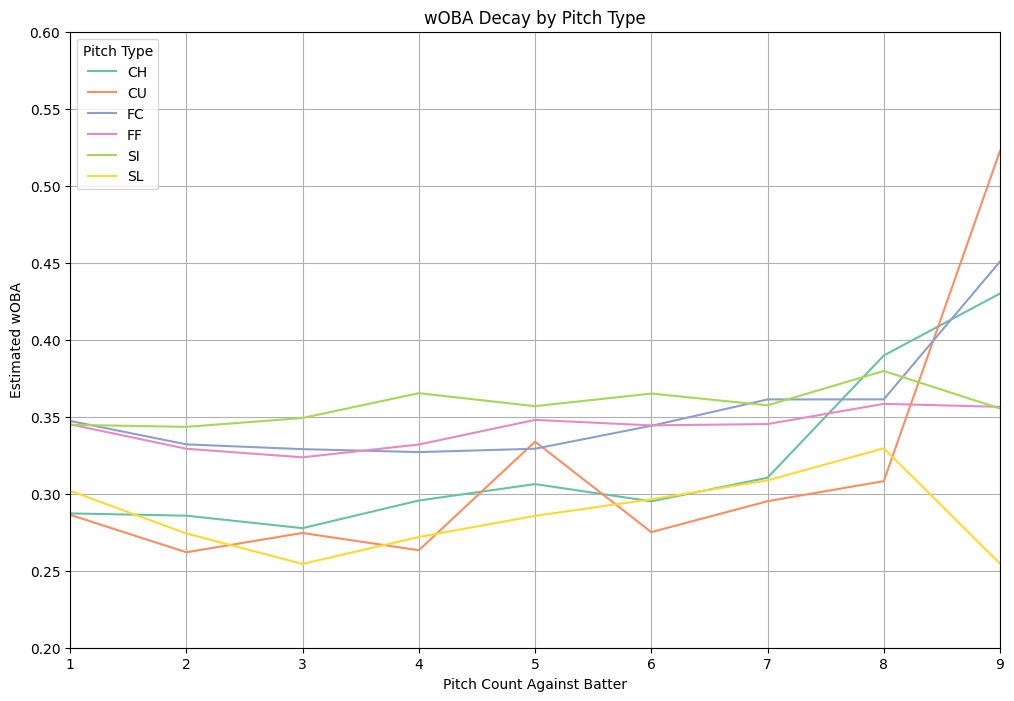

In [9]:
import pandas as pd
from pybaseball import statcast
import matplotlib.pyplot as plt
import seaborn as sns

freq_pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']

# Filter the dataset for frequent pitch types
freq_pitch = filtered_data[filtered_data['pitch_type'].isin(freq_pitch_types)]

# Calculate average wOBA per pitch count against the batter for each pitch type
pitch_woba = (
    freq_pitch.groupby(['pitch_type', 'pitch_count_bt_against_batter'])
    .agg({'estimated_woba_using_speedangle': 'mean'})
    .reset_index()
)

# Plot wOBA trends
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=pitch_woba,
    x='pitch_count_bt_against_batter',
    y='estimated_woba_using_speedangle',
    hue='pitch_type',
    palette='Set2'
)

plt.xlim(1, 9)
plt.ylim(0.2, .6)  # Adjust the range as needed
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Estimated wOBA')
plt.title('wOBA Decay by Pitch Type')
plt.grid(True)
plt.legend(title='Pitch Type')
plt.show()

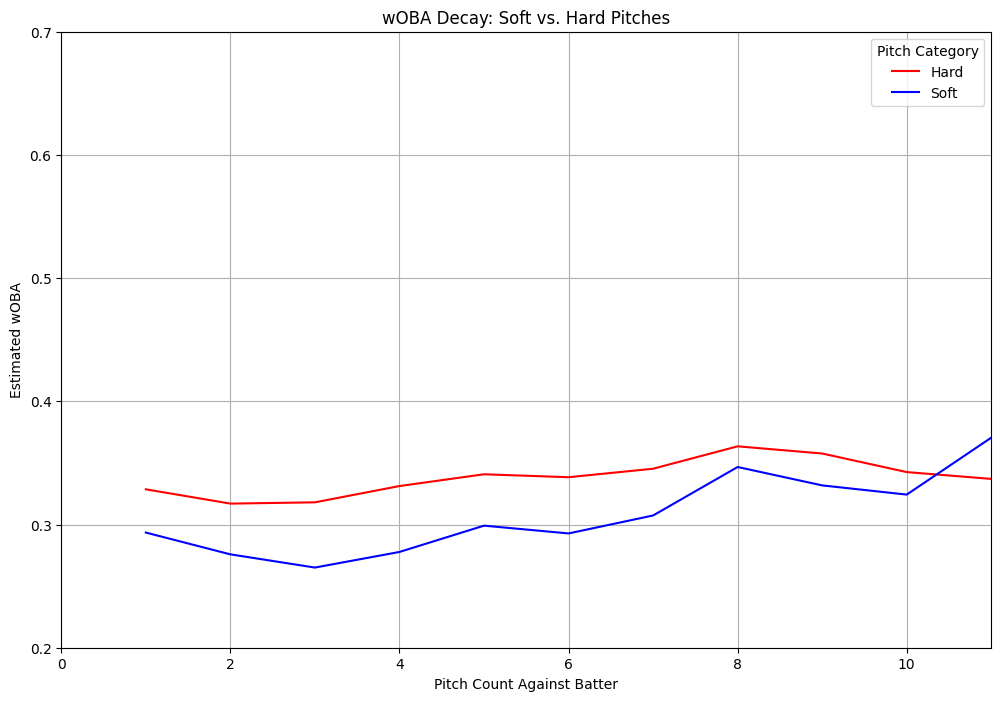

In [10]:
# Categorize pitch types
filtered_data['pitch_category'] = filtered_data['pitch_type'].apply(
    lambda x: 'Soft' if x in ['CU', 'SL', 'CH'] else 'Hard'
)

# Calculate wOBA decay by pitch category
category_woba = (
    filtered_data.groupby(['pitch_category', 'pitch_count_bt_against_batter'])
    .agg({'estimated_woba_using_speedangle': 'mean'})
    .reset_index()
)

# Plot wOBA decay for soft vs. hard pitches
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=category_woba,
    x='pitch_count_bt_against_batter',
    y='estimated_woba_using_speedangle',
    hue='pitch_category',
    palette={'Soft': 'blue', 'Hard': 'red'}
)

plt.xlim(0, 11)
# Set a smaller range for the y-axis
plt.ylim(0.2, .7)  # Adjust the range as needed
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Estimated wOBA')
plt.title('wOBA Decay: Soft vs. Hard Pitches')
plt.grid(True)
plt.legend(title='Pitch Category')
plt.show()

In [11]:
# Group data by pitch type (shape) and pitch count
pitch_shape_decay = (
    filtered_data.groupby(['pitch_type', 'pitch_count_bt_against_batter'])
    .agg({'estimated_woba_using_speedangle': 'mean'})
    .reset_index()
)

# Preview the grouped data
print(pitch_shape_decay.head())

  pitch_type  pitch_count_bt_against_batter  estimated_woba_using_speedangle
0         CH                            1.0                         0.287221
1         CH                            2.0                         0.285742
2         CH                            3.0                         0.277638
3         CH                            4.0                          0.29558
4         CH                            5.0                         0.306241


In [12]:
# Exclude pitch counts with fewer than a threshold number of samples
pitch_shape_decay = pitch_shape_decay.groupby('pitch_count_bt_against_batter').filter(lambda x: len(x) >= 10)

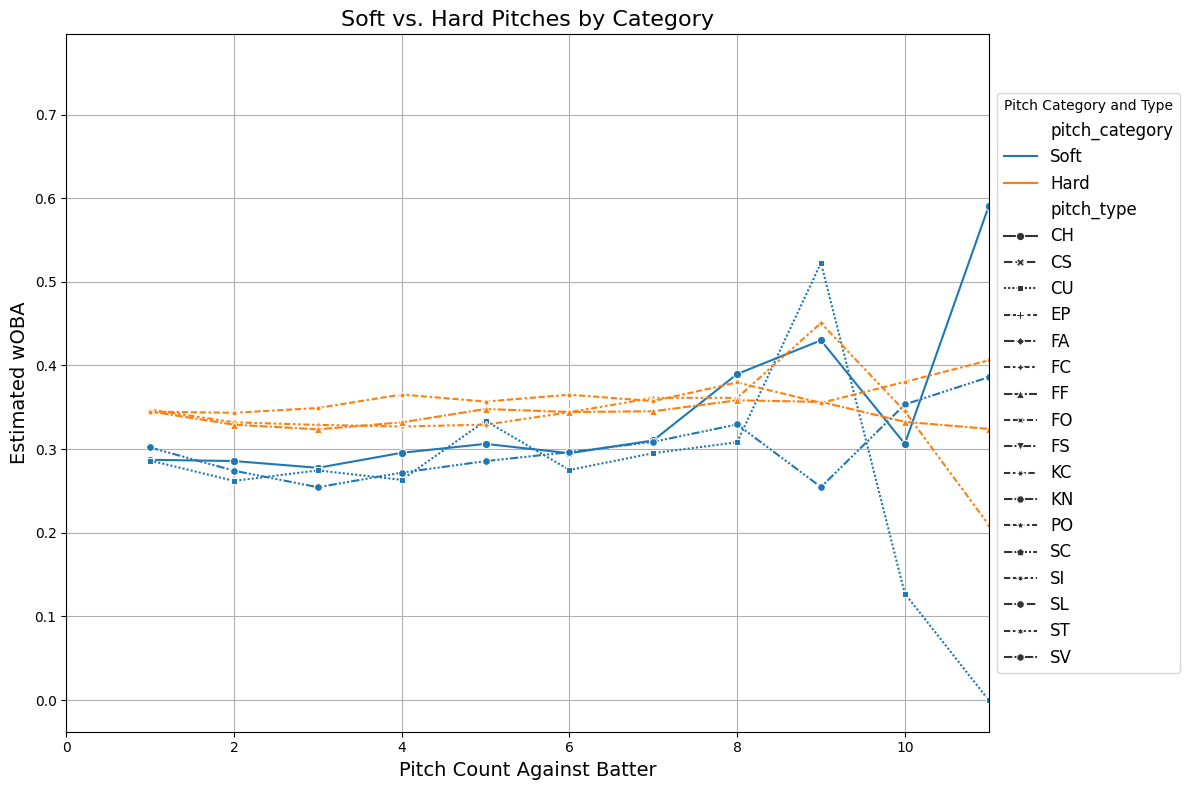

In [13]:
# Assign soft and hard pitch labels
pitch_type_category = {
    'FF': 'Hard', 'SI': 'Hard', 'FC': 'Hard',  # Hard pitches
    'CH': 'Soft', 'CU': 'Soft', 'SL': 'Soft'   # Soft pitches
}
pitch_shape_decay['pitch_category'] = pitch_shape_decay['pitch_type'].map(pitch_type_category)

# Create the line plot
plt.figure(figsize=(12, 8))  # Adjust figure size to make the plot more spacious
sns.lineplot(
    data=pitch_shape_decay,
    x='pitch_count_bt_against_batter',
    y='estimated_woba_using_speedangle',
    hue='pitch_category',
    style='pitch_type',
    markers=True
)

plt.xlim(0,11)
# Update axis labels and title
plt.xlabel('Pitch Count Against Batter', fontsize=14)
plt.ylabel('Estimated wOBA', fontsize=14)
plt.title('Soft vs. Hard Pitches by Category', fontsize=16)

# Reposition the legend outside the plot
plt.legend(
    title='Pitch Category and Type',
    loc='center left',  # Position the legend to the left of the plot
    bbox_to_anchor=(1, 0.5),  # Adjust position relative to the plot
    fontsize=12
)

# Show grid and plot
plt.grid(True)
plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


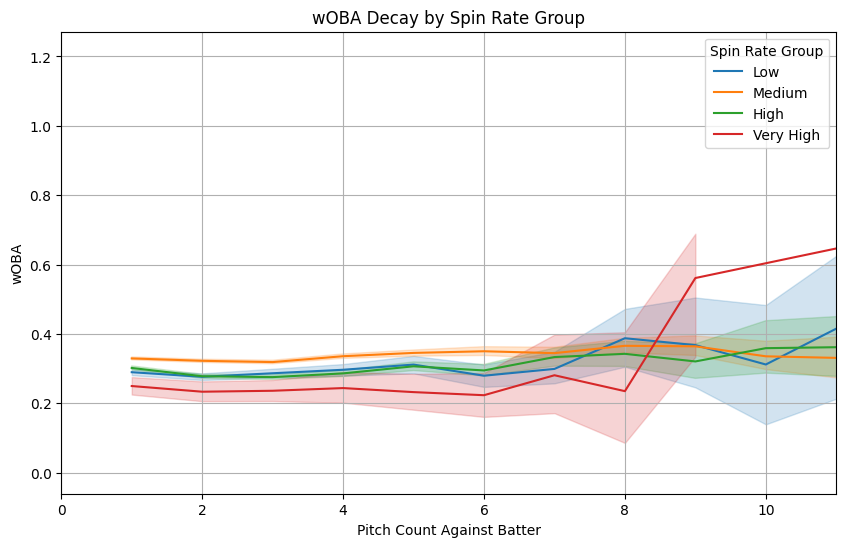

In [14]:
# Define RPM bins
rpm_bins = [0, 1800, 2400, 3000, 4000]  # Example RPM thresholds
rpm_labels = ['Low', 'Medium', 'High', 'Very High']

# Add RPM group column
filtered_data['rpm_group'] = pd.cut(filtered_data['release_spin_rate'], bins=rpm_bins, labels=rpm_labels)

# Plot wOBA decay for each RPM group
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='pitch_count_bt_against_batter',
             y='estimated_woba_using_speedangle', hue='rpm_group')
plt.xlim(0,11)
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('wOBA')
plt.title('wOBA Decay by Spin Rate Group')
plt.grid(True)
plt.legend(title='Spin Rate Group')
plt.show()

In [15]:
import pandas as pd

# Define RPM bins and labels
rpm_bins = [1500, 1950, 2400, 3000]
rpm_labels = ['Low (1500-1950 RPM)', 'Medium (1950-2400 RPM)', 'High (2400-3000 RPM)']

# Add RPM group column
filtered_data['rpm_group'] = pd.cut(filtered_data['release_spin_rate'], bins=rpm_bins, labels=rpm_labels)

# Filter for a specific pitch type (e.g., Fastball)
pitch_type_to_plot = 'FF'
filtered_pitch_data = filtered_data[filtered_data['pitch_type'] == pitch_type_to_plot]

# Create a pivot table with counts
sample_size_table = (
    filtered_pitch_data
    .groupby(['pitch_count_bt_against_batter', 'rpm_group'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns for clarity
sample_size_table.columns.name = 'RPM Group'
sample_size_table.index.name = 'Pitch Count'
sample_size_table.reset_index(inplace=True)

# Display the table
sample_size_table.head(8)

<ipython-input-15-f6239c0d0567>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['pitch_count_bt_against_batter', 'rpm_group'])


RPM Group,Pitch Count,Low (1500-1950 RPM),Medium (1950-2400 RPM),High (2400-3000 RPM)
0,1.0,1600,53818,19629
1,2.0,981,37551,14488
2,3.0,642,25292,9834
3,4.0,439,16203,6141
4,5.0,261,10083,3739
5,6.0,161,6029,2236
6,7.0,92,3564,1222
7,8.0,61,2038,726


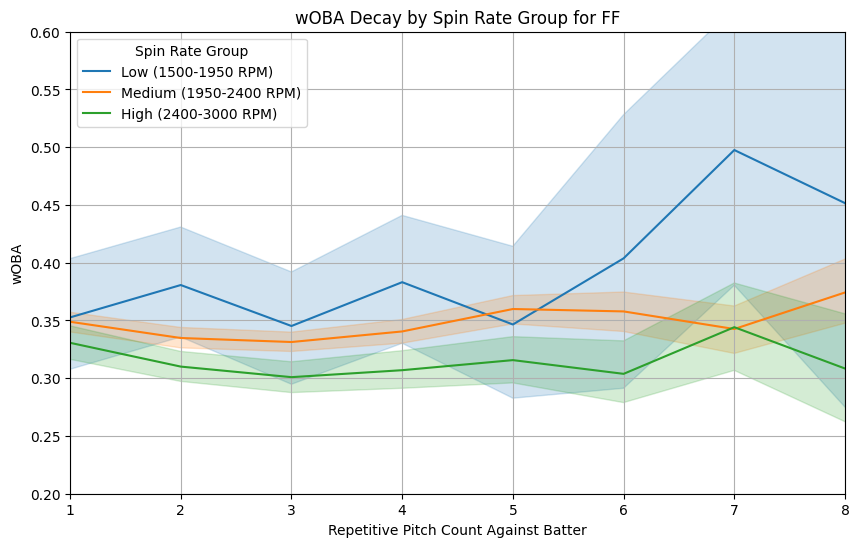

In [16]:
# Define RPM bins
rpm_bins = [1500, 1950, 2400, 3000]  # Example RPM thresholds
rpm_labels = ['Low (1500-1950 RPM)', 'Medium (1950-2400 RPM)', 'High (2400-3000 RPM)']

# Add RPM group column
filtered_data['rpm_group'] = pd.cut(filtered_data['release_spin_rate'], bins=rpm_bins, labels=rpm_labels)

# Filter for a specific pitch type, e.g., 'FF' (Fastball)
pitch_type_to_plot = 'FF'
filtered_pitch_data = filtered_data[filtered_data['pitch_type'] == pitch_type_to_plot]

# Plot wOBA decay for each RPM group for the selected pitch type
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_pitch_data, x='pitch_count_bt_against_batter',
             y='estimated_woba_using_speedangle', hue='rpm_group')
plt.xlim(1, 8)
plt.ylim(0.2, .6)
plt.xlabel('Repetitive Pitch Count Against Batter')
plt.ylabel('wOBA')
plt.title(f'wOBA Decay by Spin Rate Group for {pitch_type_to_plot}')
plt.grid(True)
plt.legend(title='Spin Rate Group')
plt.show()

In [17]:
import pandas as pd

# Group by 'pitch_count_bt_against_batter' and 'rpm_group' and calculate the mean wOBA
woba_summary = filtered_pitch_data.groupby(['pitch_count_bt_against_batter', 'rpm_group'])['estimated_woba_using_speedangle'].mean().reset_index()

# Pivot the data to create a table
woba_table = woba_summary.pivot(index='pitch_count_bt_against_batter', columns='rpm_group', values='estimated_woba_using_speedangle')

woba_table.head(9)

<ipython-input-17-595cbe8c8eef>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woba_summary = filtered_pitch_data.groupby(['pitch_count_bt_against_batter', 'rpm_group'])['estimated_woba_using_speedangle'].mean().reset_index()


rpm_group,Low (1500-1950 RPM),Medium (1950-2400 RPM),High (2400-3000 RPM)
pitch_count_bt_against_batter,,,
1.0,0.352636,0.348888,0.330671
2.0,0.380687,0.334824,0.310066
3.0,0.345215,0.331343,0.30092
4.0,0.383154,0.340497,0.306954
5.0,0.346518,0.359926,0.315672
6.0,0.403786,0.357839,0.303791
7.0,0.497567,0.342597,0.344187
8.0,0.451591,0.374251,0.308385
9.0,0.335367,0.374483,0.30376


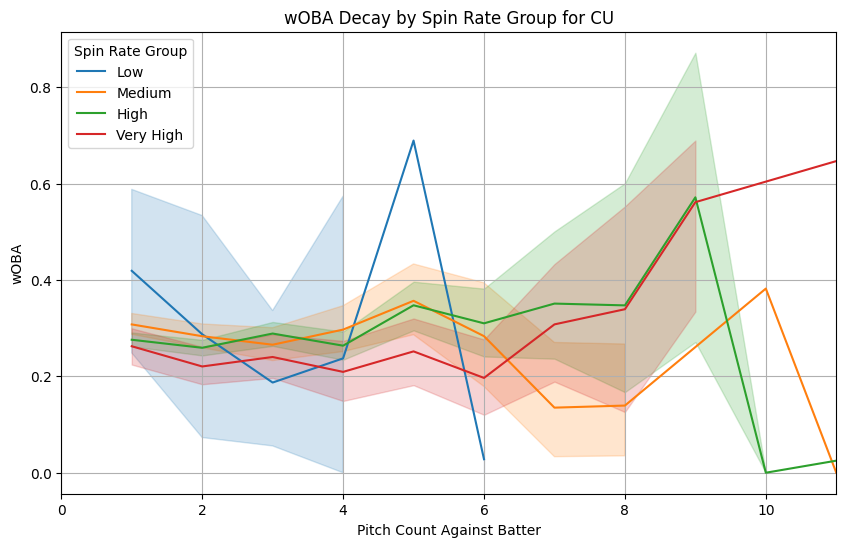

In [18]:
# Define RPM bins
rpm_bins = [0, 1800, 2400, 3000, 4000]  # Example RPM thresholds
rpm_labels = ['Low', 'Medium', 'High', 'Very High']

# Add RPM group column
filtered_data['rpm_group'] = pd.cut(filtered_data['release_spin_rate'], bins=rpm_bins, labels=rpm_labels)

# Filter for a specific pitch type, e.g., 'FF' (Fastball)
pitch_type_to_plot = 'CU'
filtered_pitch_data = filtered_data[filtered_data['pitch_type'] == pitch_type_to_plot]

# Plot wOBA decay for each RPM group for the selected pitch type
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_pitch_data, x='pitch_count_bt_against_batter',
             y='estimated_woba_using_speedangle', hue='rpm_group')
plt.xlim(0, 11)
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('wOBA')
plt.title(f'wOBA Decay by Spin Rate Group for {pitch_type_to_plot}')
plt.grid(True)
plt.legend(title='Spin Rate Group')
plt.show()

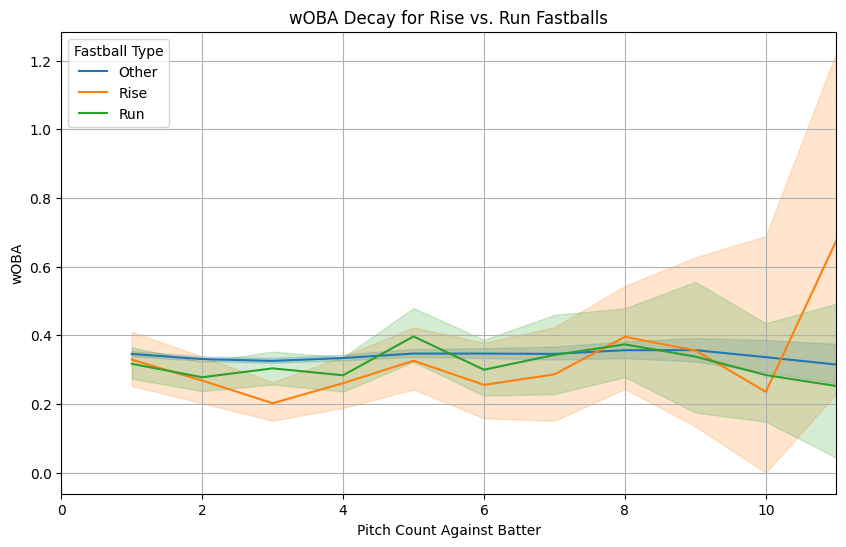

In [19]:
import numpy as np

# Classify fastballs into 'Rise', 'Run', or 'Other'
filtered_data['fastball_type'] = np.where(
    (filtered_data['pitch_type'] == 'FF') & (filtered_data['pfx_z'] > 1.75),
    'Rise',
    np.where(
        (filtered_data['pitch_type'] == 'FF') & ((filtered_data['pfx_z'] <= 0.5) | (filtered_data['pfx_x'] >= 1.25)),
        'Run',
        'Other'
    )
)

# Filter for fastballs
fastballs = filtered_data[filtered_data['pitch_type'] == 'FF']

# Plot wOBA decay for rise vs. run fastballs
plt.figure(figsize=(10, 6))
sns.lineplot(data=fastballs, x='pitch_count_bt_against_batter',
             y='estimated_woba_using_speedangle', hue='fastball_type')
plt.xlim(0,11)
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('wOBA')
plt.title('wOBA Decay for Rise vs. Run Fastballs')
plt.grid(True)
plt.legend(title='Fastball Type')
plt.show()

In [20]:
# Calculate wOBA difference between early and late pitch counts
pitcher_decay = filtered_data.groupby('pitcher').apply(
    lambda x: x[x['pitch_count_bt_against_batter'] > 5]['estimated_woba_using_speedangle'].mean() -
              x[x['pitch_count_bt_against_batter'] <= 5]['estimated_woba_using_speedangle'].mean()
).reset_index(name='woba_decay')

# Convert 'woba_decay' to numeric
pitcher_decay['woba_decay'] = pd.to_numeric(pitcher_decay['woba_decay'], errors='coerce')

# Drop any rows with NaN values in 'woba_decay'
pitcher_decay = pitcher_decay.dropna(subset=['woba_decay'])

# Filter pitchers with the highest decay
top_decay_pitchers = pitcher_decay.nlargest(10, 'woba_decay')

# Join with pitcher data for analysis
decay_data = pd.merge(filtered_data, top_decay_pitchers, on='pitcher')

<ipython-input-20-053c7d94f6e4>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pitcher_decay = filtered_data.groupby('pitcher').apply(


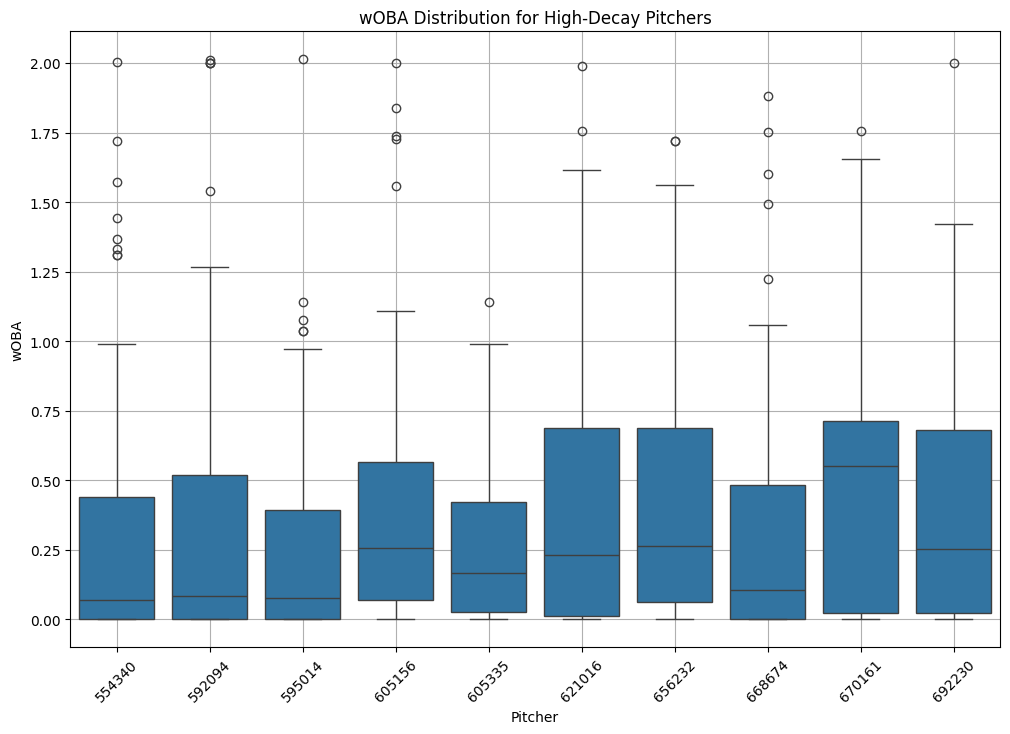

In [21]:
# Plot for decay-heavy pitchers
plt.figure(figsize=(12, 8))
sns.boxplot(data=decay_data, x='pitcher', y='estimated_woba_using_speedangle')
plt.xticks(rotation=45)
plt.xlabel('Pitcher')
plt.ylabel('wOBA')
plt.title('wOBA Distribution for High-Decay Pitchers')
plt.grid(True)
plt.show()

In [22]:
from pybaseball import playerid_reverse_lookup
import pandas as pd

# List of pitcher IDs
pitcher_ids = [554340, 592094, 595014, 605156, 605335, 621016, 656232, 670161, 676254, 692230
]

# Use pybaseball's reverse lookup to get player info
player_info = playerid_reverse_lookup(pitcher_ids, key_type='mlbam')

# Display player information
print(player_info[['name_first', 'name_last', 'key_mlbam']])

# Optionally save to a CSV
player_info[['name_first', 'name_last', 'key_mlbam']].to_csv('pitcher_names.csv', index=False)

Gathering player lookup table. This may take a moment.
  name_first  name_last  key_mlbam
0      jason       adam     592094
1     parker    dunshee     670161
2       ryan     walker     676254
3      blake    treinen     595014
4       yimi     garcía     554340
5    brandon     bielak     656232
6    brandon  leibrandt     605335
7       josé       cuas     621016
8      aaron     brooks     605156
9     carlos  rodriguez     692230


In [23]:
# Filter Joey Estes' data
joey_data = filtered_data[filtered_data['pitcher'] == 683155]

# Check unique pitch types
joey_pitch_types = joey_data['pitch_type'].unique()
print("Pitch Types:", joey_pitch_types)

Pitch Types: ['FF' 'FC' 'SL' 'CH' 'ST' 'SI']


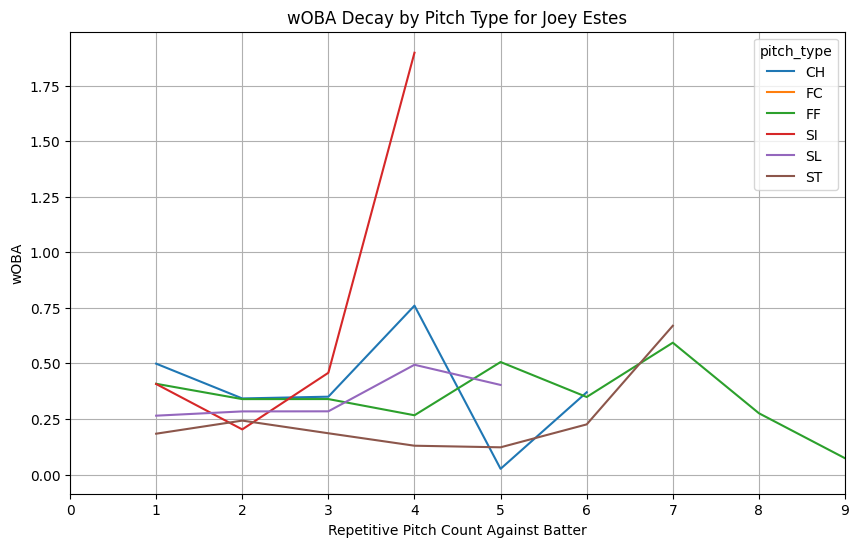

In [24]:
# Group by pitch count and calculate average wOBA
joey_woba_decay = joey_data.groupby(['pitch_count_bt_against_batter', 'pitch_type'])['estimated_woba_using_speedangle'].mean().reset_index()

# Line Plot for wOBA Decay
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=joey_woba_decay, x='pitch_count_bt_against_batter', y='estimated_woba_using_speedangle', hue='pitch_type')
plt.xlim(0,9)
plt.title("wOBA Decay by Pitch Type for Joey Estes")
plt.xlabel("Repetitive Pitch Count Against Batter")
plt.ylabel("wOBA")
plt.grid(True)
plt.show()

<ipython-input-25-a5c96539d7be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pitch_type_counts, x='Pitch Type', y='Count', palette='viridis')


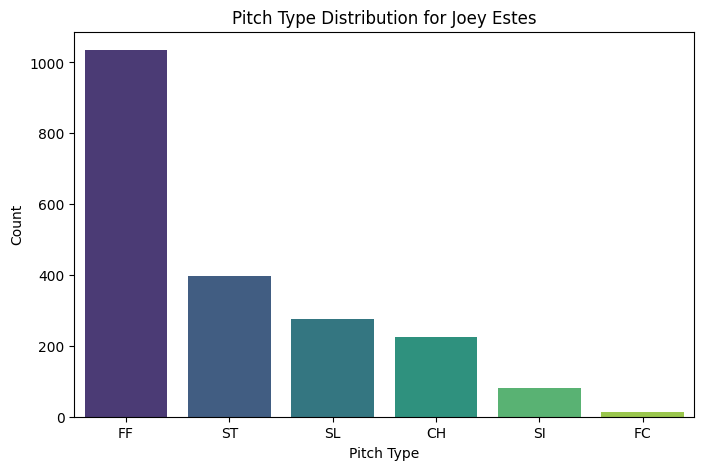

In [25]:
# Bar Chart: Pitch Type Distribution
pitch_type_counts = joey_data['pitch_type'].value_counts().reset_index()
pitch_type_counts.columns = ['Pitch Type', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=pitch_type_counts, x='Pitch Type', y='Count', palette='viridis')
plt.title("Pitch Type Distribution for Joey Estes")
plt.xlabel("Pitch Type")
plt.ylabel("Count")
plt.show()

<ipython-input-26-17eb8596701e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=joey_data, x='pitch_type', y='estimated_woba_using_speedangle', palette='coolwarm')


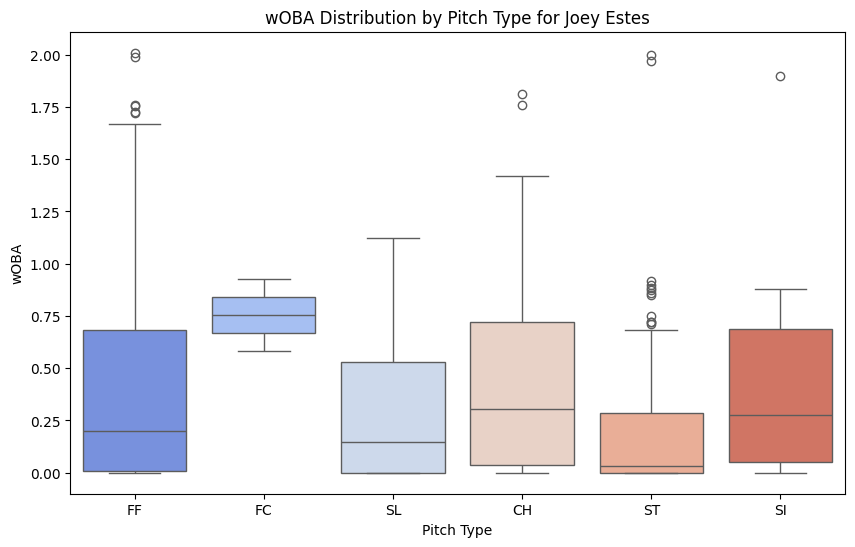

In [26]:
# Box Plot: wOBA Distribution by Pitch Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=joey_data, x='pitch_type', y='estimated_woba_using_speedangle', palette='coolwarm')
plt.title("wOBA Distribution by Pitch Type for Joey Estes")
plt.xlabel("Pitch Type")
plt.ylabel("wOBA")
plt.show()

In [27]:
def categorize_event(event):
    if event in ['single', 'double', 'triple', 'home_run']:
        return 'hit'
    elif event in ['strikeout', 'strikeout_double_play']:
        return 'strikeout'
    elif event in ['walk', 'intent_walk', 'hit_by_pitch']:
        return 'walk/hbp'
    elif event in ['field_out', 'grounded_into_double_play', 'sac_fly', 'sac_bunt',
                   'force_out', 'double_play', 'fielders_choice']:
        return 'batted_out'
    else:
        return None

# Apply the function to create a new event group column
filtered_data['event_group'] = filtered_data['events'].apply(categorize_event)

# Drop rows where the event group is None
filtered_data.dropna(subset=['event_group'], inplace=True)

<Figure size 1200x800 with 0 Axes>

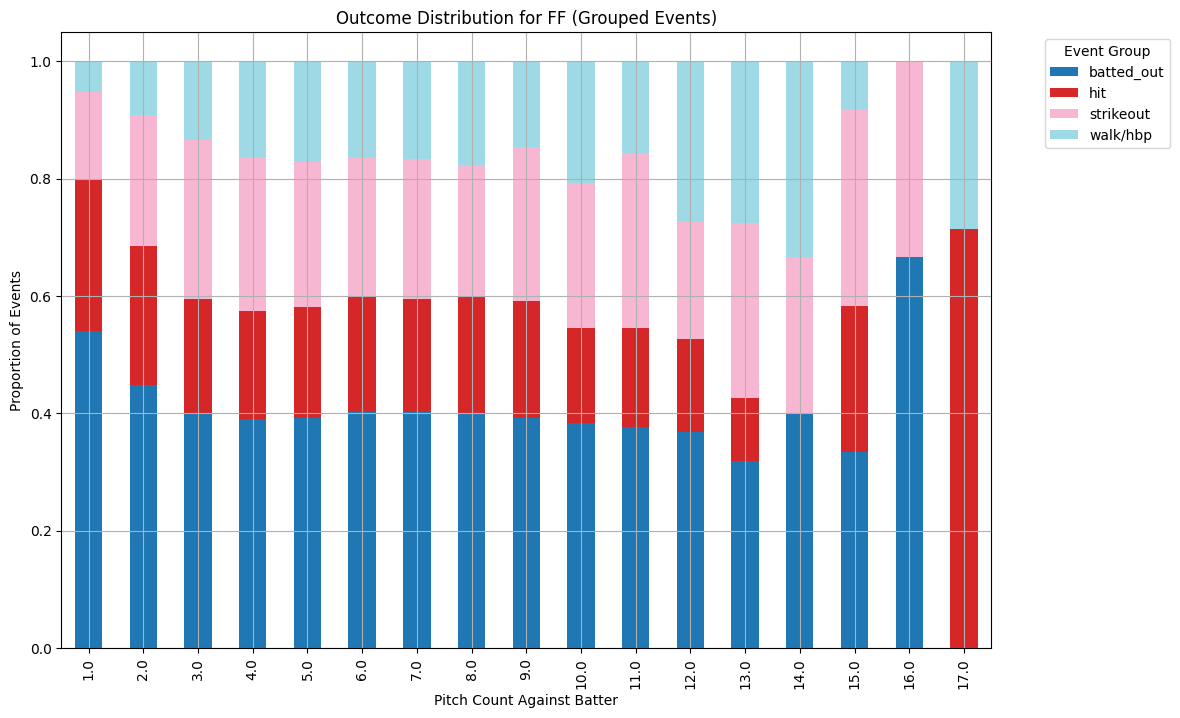

<Figure size 1200x800 with 0 Axes>

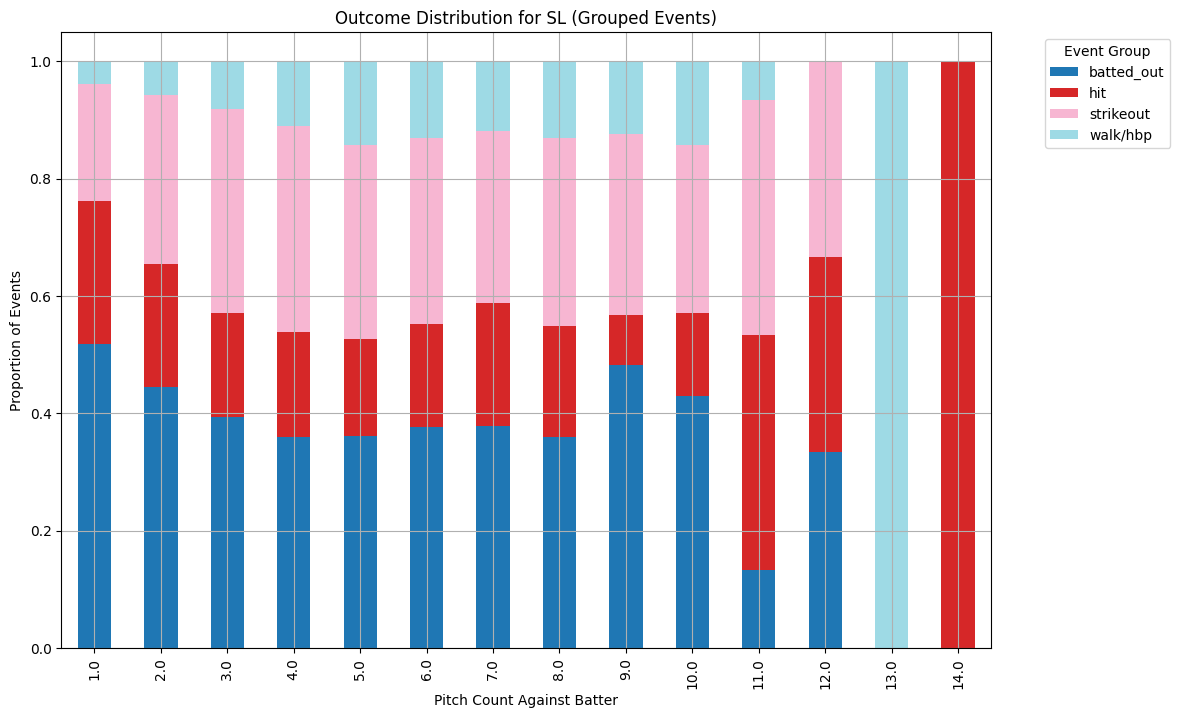

<Figure size 1200x800 with 0 Axes>

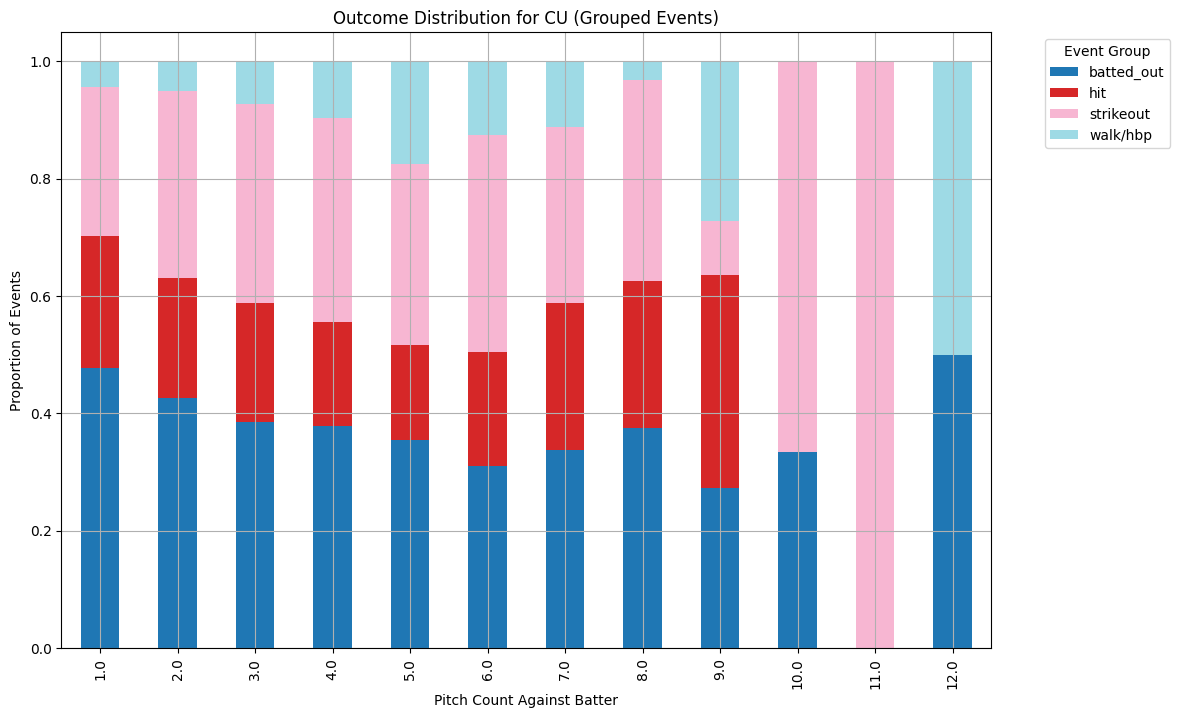

<Figure size 1200x800 with 0 Axes>

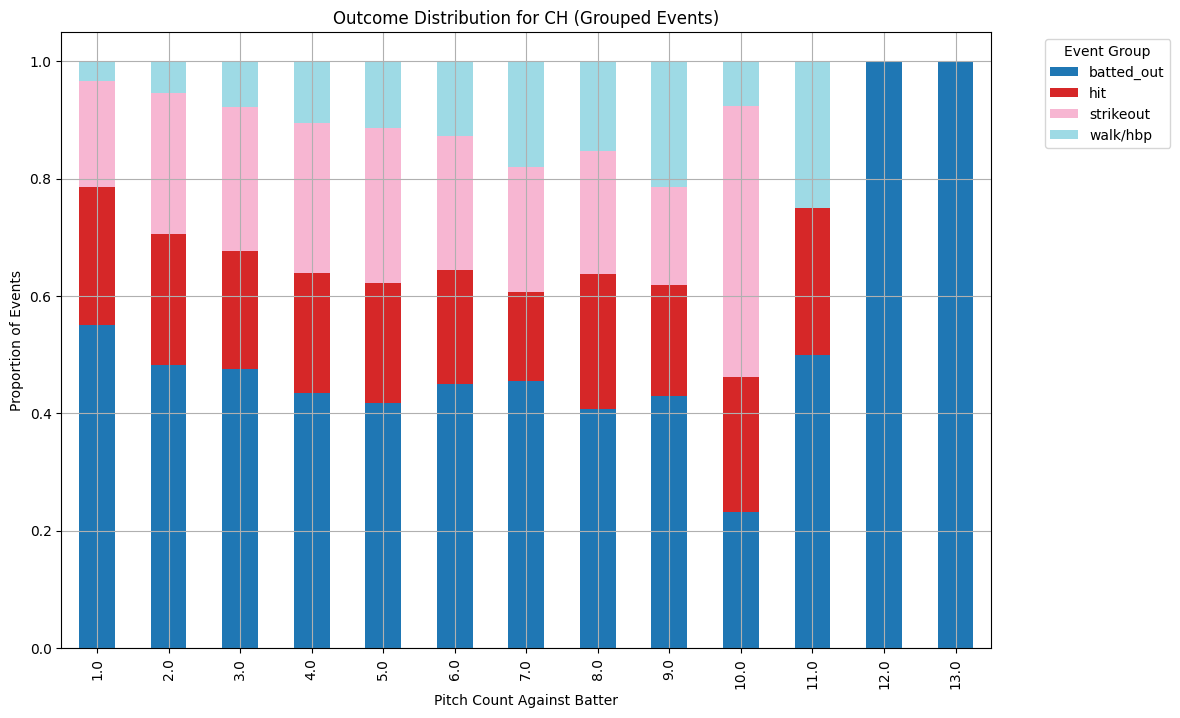

<Figure size 1200x800 with 0 Axes>

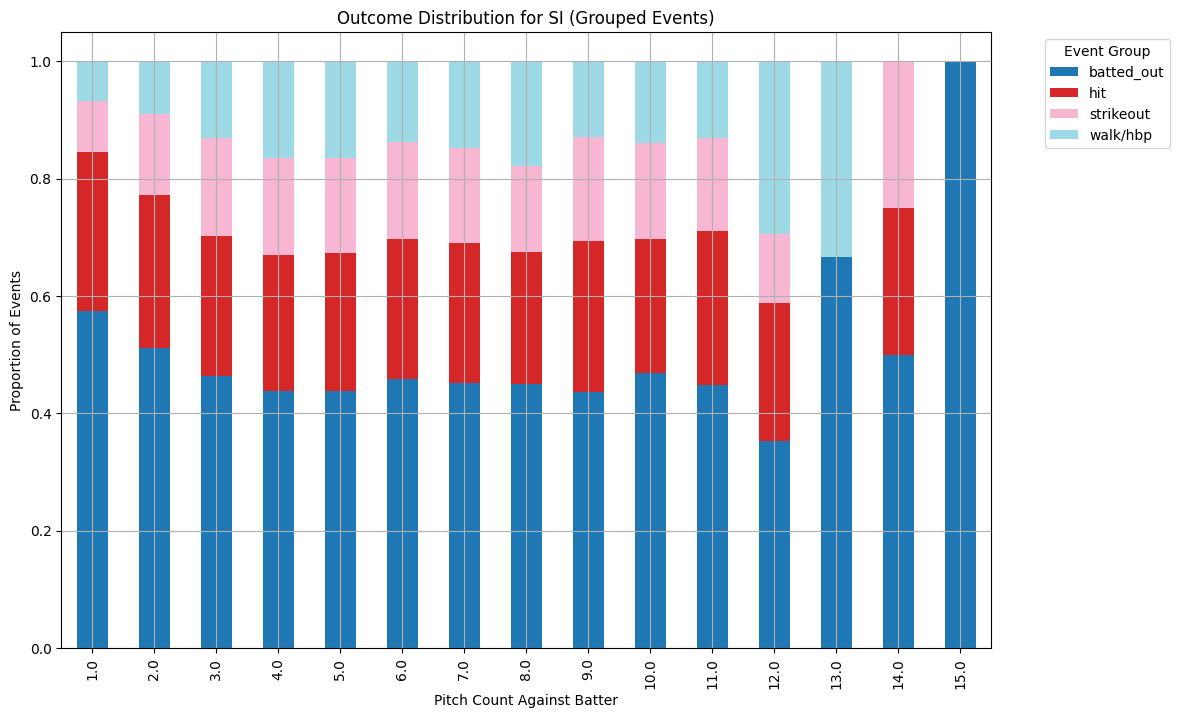

<Figure size 1200x800 with 0 Axes>

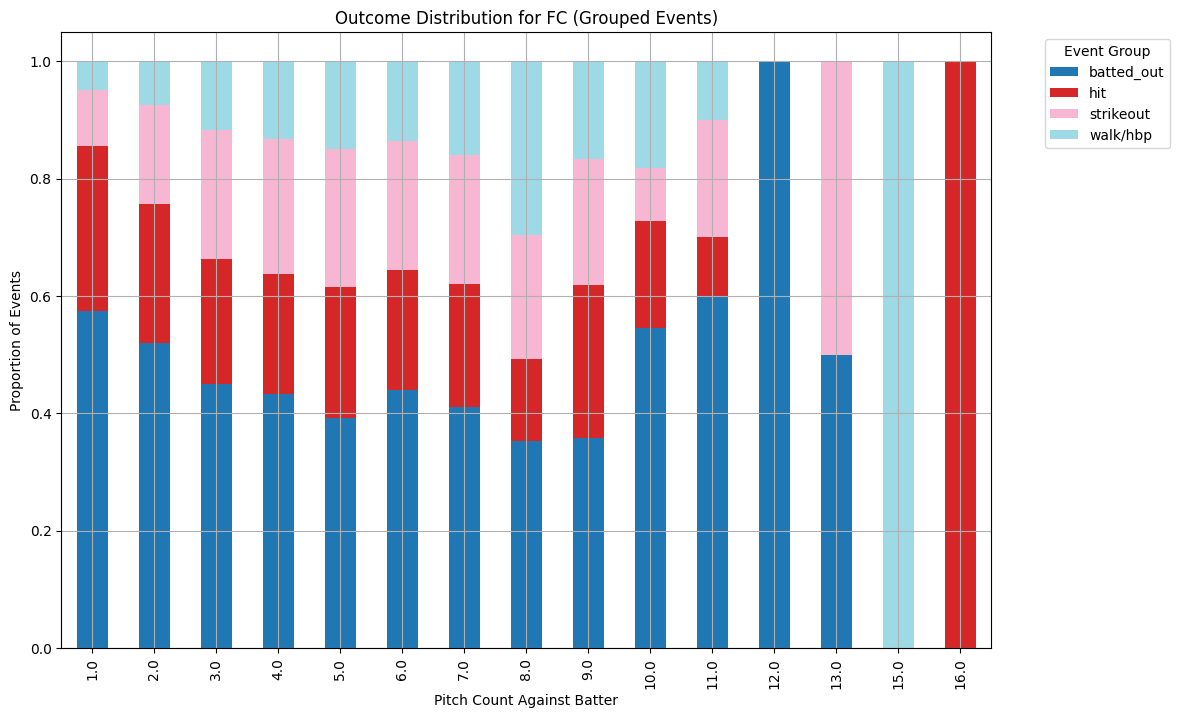

In [28]:
import pandas as pd
from pybaseball import statcast
import matplotlib.pyplot as plt
import seaborn as sns

# List of pitch types to analyze
pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']

for pitch in pitch_types:
    # Filter the dataset for the current pitch type
    pitch_data = filtered_data[filtered_data['pitch_type'] == pitch]

    # Create a pivot table for event analysis by pitch count
    event_analysis = pd.pivot_table(
        pitch_data,
        values='pitch_type',
        index='pitch_count_bt_against_batter',
        columns='event_group',
        aggfunc='count',
        fill_value=0
    )

    # Normalize the counts to get the percentage distribution of events
    event_analysis = event_analysis.div(event_analysis.sum(axis=1), axis=0)

    # Plot the distribution of grouped events
    plt.figure(figsize=(12, 8))
    event_analysis.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
    plt.xlabel('Pitch Count Against Batter')
    plt.ylabel('Proportion of Events')
    plt.title(f'Outcome Distribution for {pitch} (Grouped Events)')
    plt.legend(title='Event Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

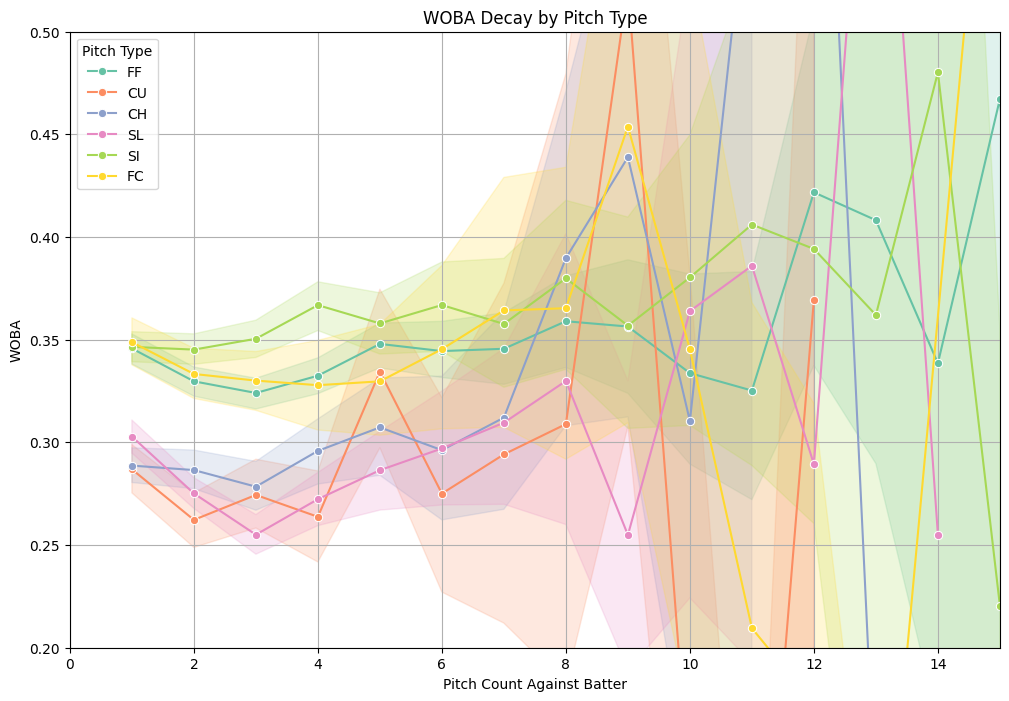

In [29]:
# List of pitch types to analyze
pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']

# Filter the dataset to include only the selected pitch types
filtered_pitch_data = filtered_data[filtered_data['pitch_type'].isin(pitch_types)]

# Create a single plot with all pitch types
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=filtered_pitch_data,
    x='pitch_count_bt_against_batter',
    y='estimated_woba_using_speedangle',
    hue='pitch_type',
    marker='o',
    palette='Set2'
)

plt.xlim(0, 15)
# Set a smaller range for the y-axis
plt.ylim(0.2, .5)  # Adjust the range as needed


# Add labels and title
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('WOBA')
plt.title('WOBA Decay by Pitch Type')
plt.grid(True)
plt.legend(title='Pitch Type')
plt.show()

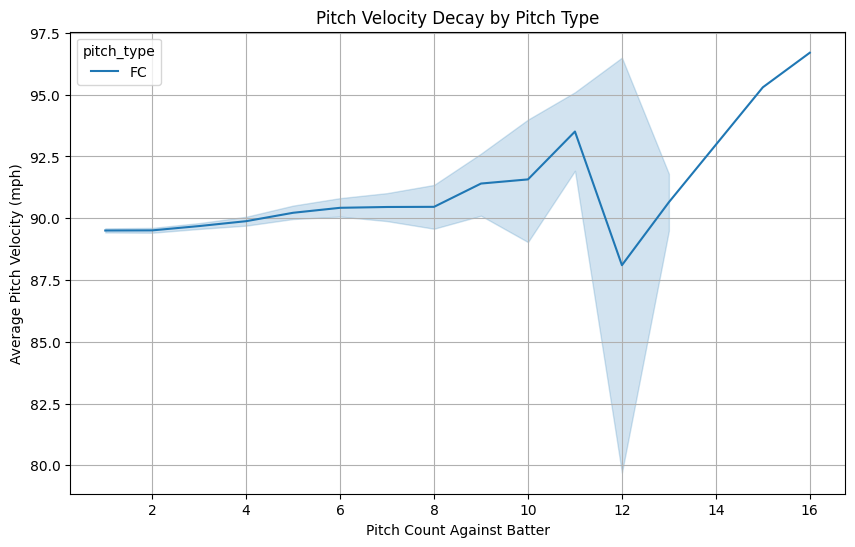

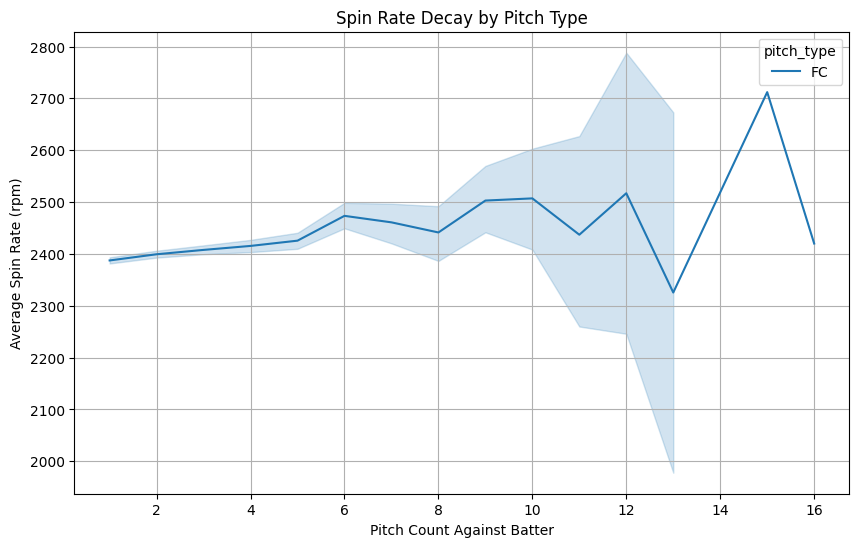

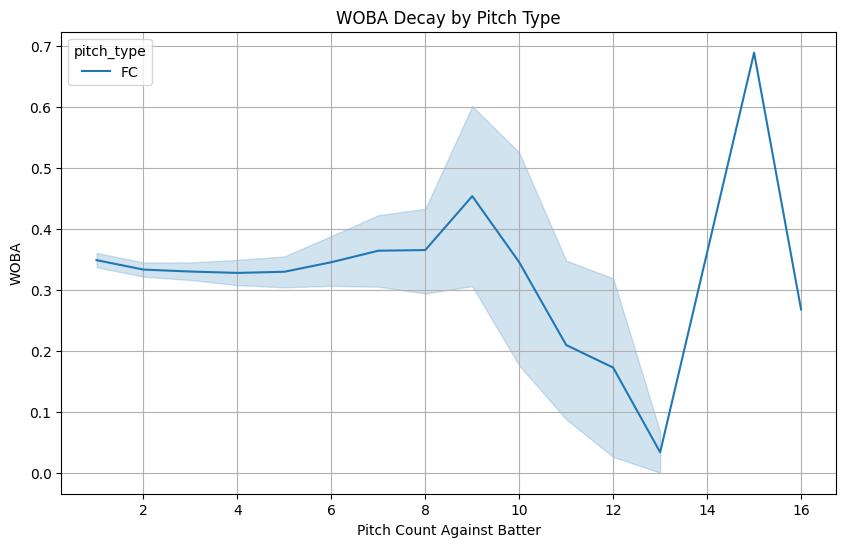

In [30]:
# Analyze velocity decay
plt.figure(figsize=(10, 6))
sns.lineplot(data=pitch_data, x='pitch_count_bt_against_batter', y='release_speed', hue='pitch_type')
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Average Pitch Velocity (mph)')
plt.title('Pitch Velocity Decay by Pitch Type')
plt.grid(True)
plt.show()

# Analyze spin rate decay
plt.figure(figsize=(10, 6))
sns.lineplot(data=pitch_data, x='pitch_count_bt_against_batter', y='release_spin_rate', hue='pitch_type')
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Average Spin Rate (rpm)')
plt.title('Spin Rate Decay by Pitch Type')
plt.grid(True)
plt.show()

# Analyze WOBA decay
plt.figure(figsize=(10, 6))
sns.lineplot(data=pitch_data, x='pitch_count_bt_against_batter', y='estimated_woba_using_speedangle', hue='pitch_type')
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('WOBA')
plt.title('WOBA Decay by Pitch Type')
plt.grid(True)
plt.show()

In [31]:
filtered_data.head()

,pitch_type,game_date,release_speed,release_spin_rate,release_pos_x,release_pos_y,release_pos_z,vx0,vy0,vz0,...,events,stand,p_throws,pitcher,estimated_woba_using_speedangle,pitch_count_bt_against_batter,pitch_category,rpm_group,fastball_type,event_group
3,FF,2024-04-01,94.5,2220,1.78,54.09,5.93,-5.923646,-137.3539,-6.205352,...,single,L,L,671096,0.899,2.0,Hard,Medium,Other,hit
11,ST,2024-04-01,82.2,2738,1.95,53.91,5.9,-3.834617,-119.549686,-4.557598,...,walk,R,L,671096,0.689131,2.0,Hard,High,Other,walk/hbp
17,CU,2024-04-01,81.8,2992,1.55,53.92,6.09,-4.588781,-119.105099,-3.467241,...,strikeout,L,L,671096,0.0,1.0,Soft,High,Other,strikeout
22,CH,2024-04-01,85.2,2329,1.95,53.95,5.89,-5.211692,-123.842557,-6.302731,...,field_out,R,L,671096,0.188,1.0,Soft,Medium,Other,batted_out
25,CH,2024-04-01,85.0,2213,2.01,54.01,5.94,-3.710201,-123.774361,-3.767573,...,double,R,L,671096,0.05,1.0,Soft,Medium,Other,hit


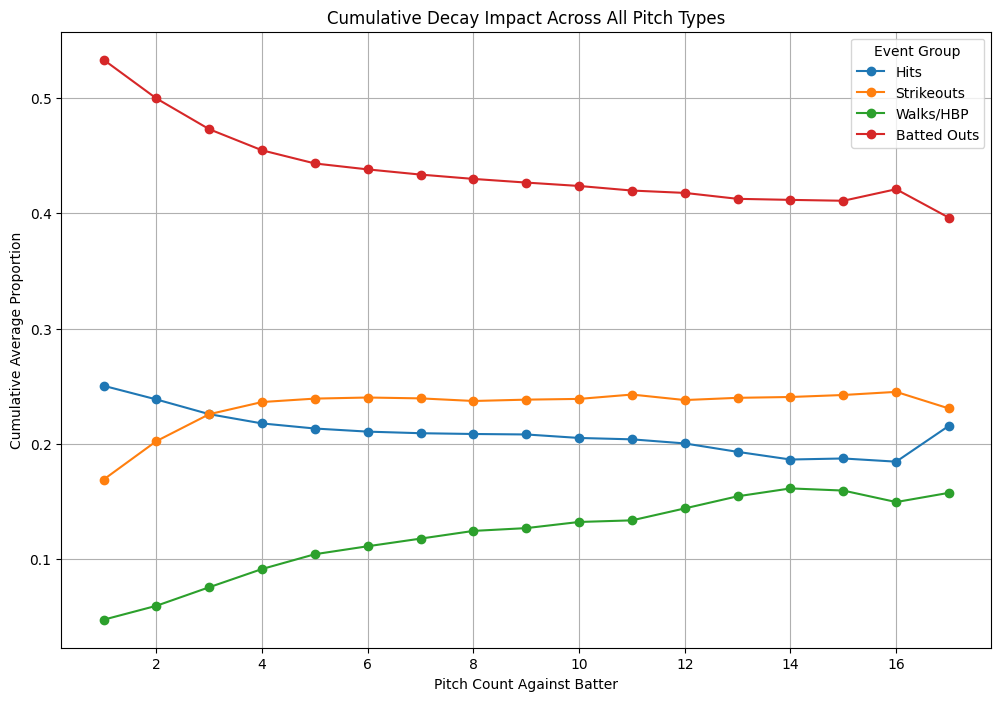

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate the data across all pitch types by pitch_count_against_batter
cumulative_analysis = pd.pivot_table(
    filtered_data,
    values='pitch_type',
    index='pitch_count_bt_against_batter',
    columns='event_group',
    aggfunc='count',
    fill_value=0
)

# Step 2: Normalize the counts to get proportions
cumulative_analysis = cumulative_analysis.div(cumulative_analysis.sum(axis=1), axis=0)

# Step 3: Calculate cumulative averages for each event type
cumulative_analysis['cumulative_hits'] = cumulative_analysis['hit'].cumsum() / cumulative_analysis.index
cumulative_analysis['cumulative_strikeouts'] = cumulative_analysis['strikeout'].cumsum() / cumulative_analysis.index
cumulative_analysis['cumulative_walks'] = cumulative_analysis['walk/hbp'].cumsum() / cumulative_analysis.index
cumulative_analysis['cumulative_batted_out'] = cumulative_analysis['batted_out'].cumsum() / cumulative_analysis.index

# Step 4: Plot the cumulative averages
plt.figure(figsize=(12, 8))
plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_hits'], label='Hits', marker='o')
plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_strikeouts'], label='Strikeouts', marker='o')
plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_walks'], label='Walks/HBP', marker='o')
plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_batted_out'], label='Batted Outs', marker='o')

# Step 5: Add labels and legend
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Cumulative Average Proportion')
plt.title('Cumulative Decay Impact Across All Pitch Types')
plt.legend(title='Event Group')
plt.grid(True)
plt.show()

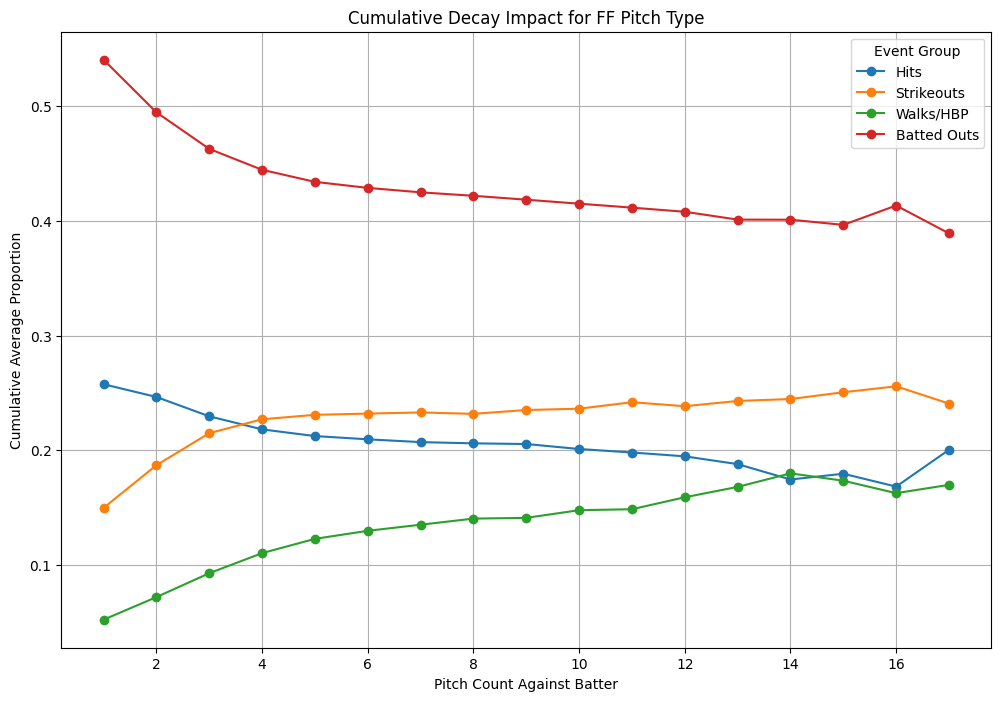

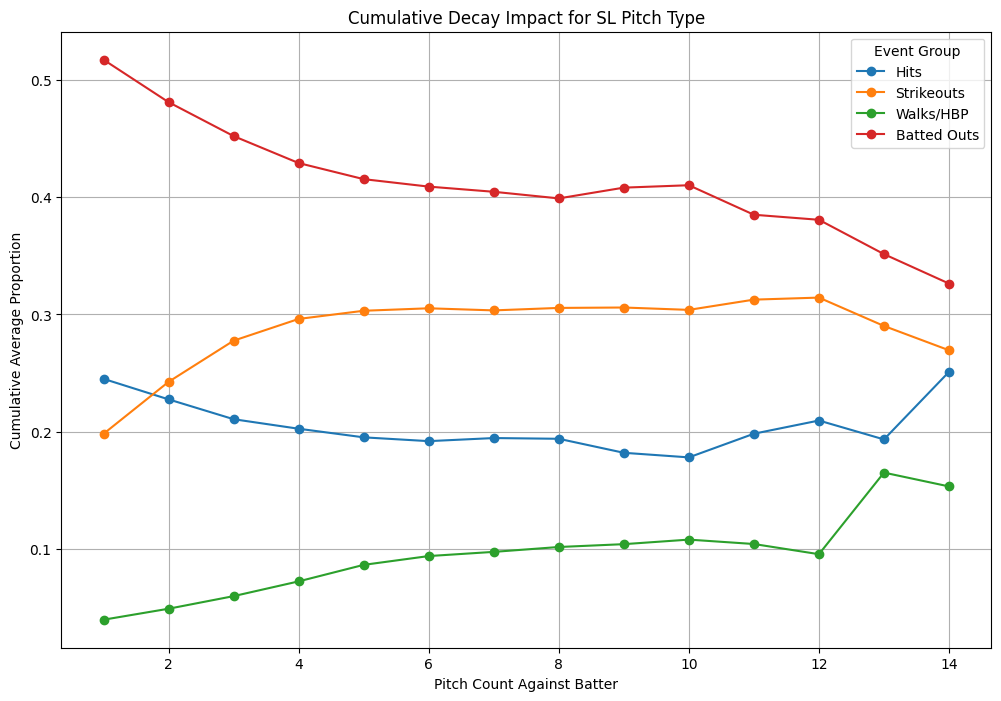

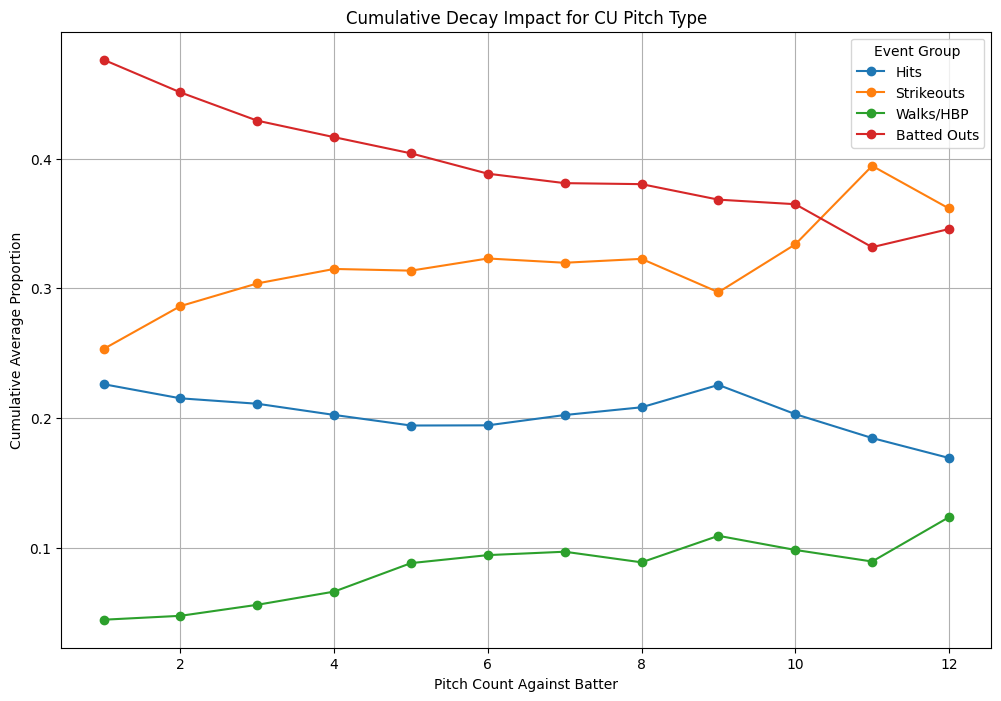

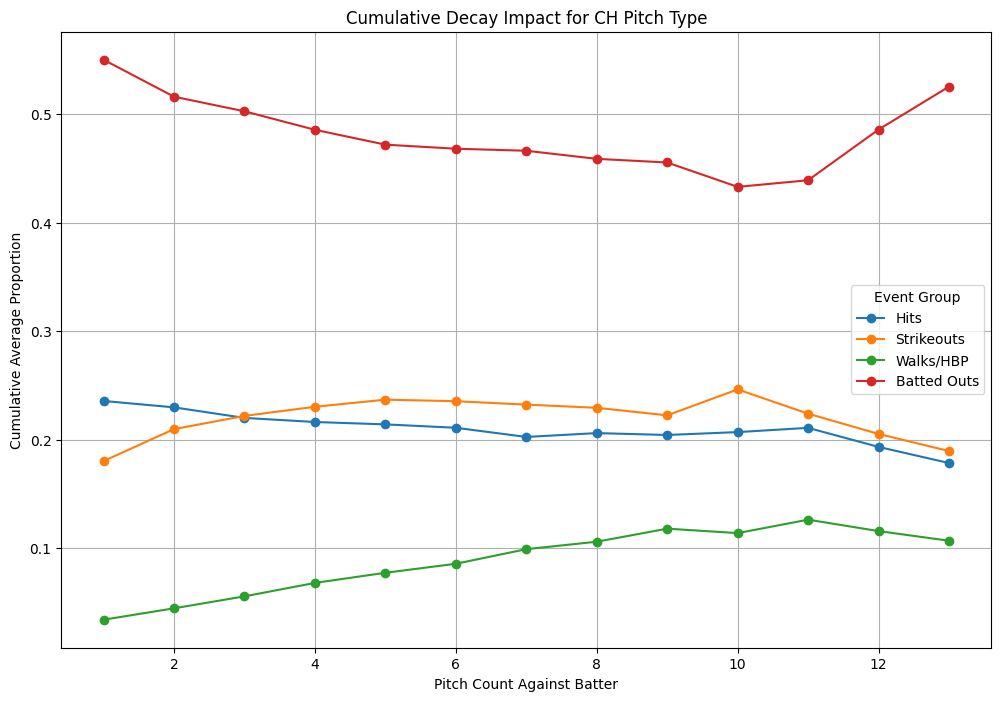

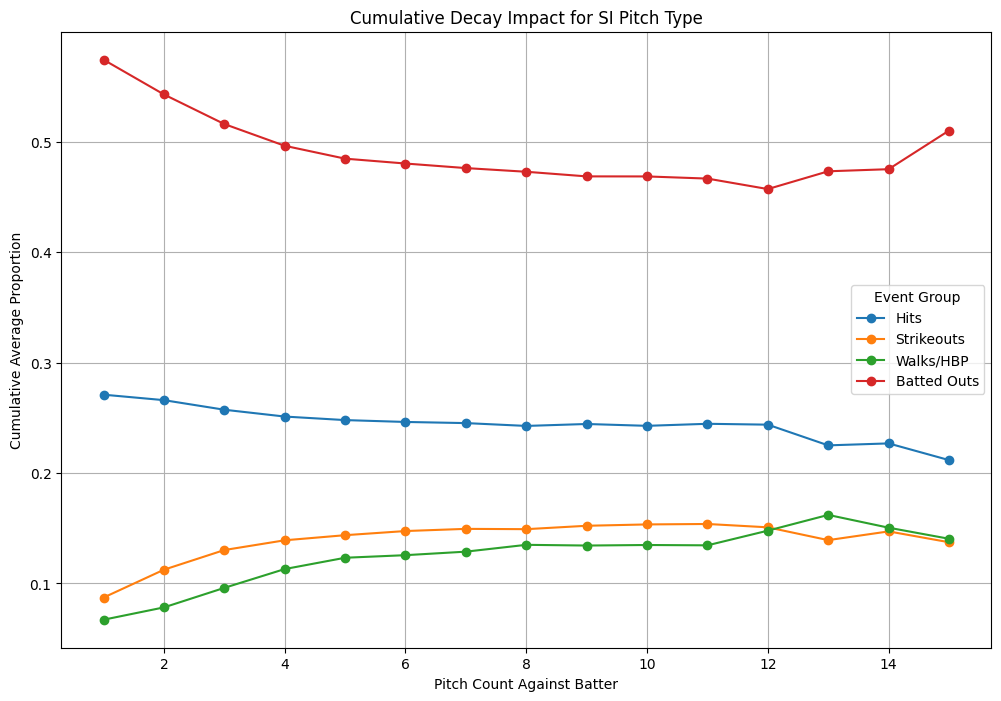

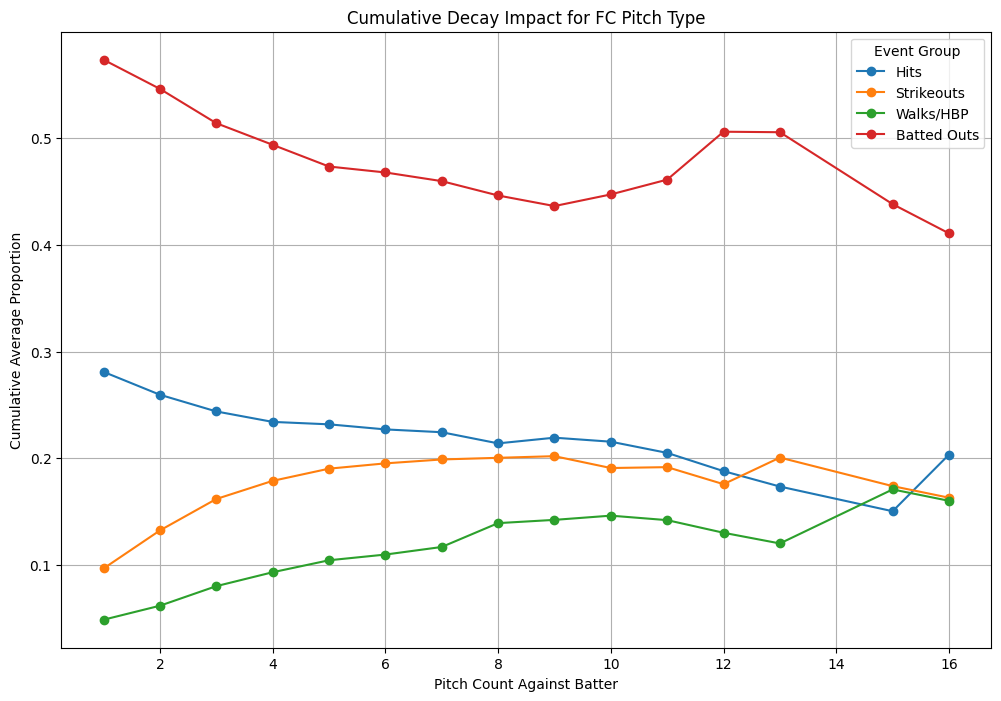

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# List of common pitch types to analyze
pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']  # Fastball, Slider, Curveball, Changeup, Sinker, Cutter

# Loop through each pitch type and perform cumulative analysis
for pitch in pitch_types:
    # Filter the dataset for the current pitch type
    pitch_data = filtered_data[filtered_data['pitch_type'] == pitch]

    # Create a pivot table to count occurrences of each event by pitch count
    cumulative_analysis = pd.pivot_table(
        pitch_data,
        values='pitch_type',
        index='pitch_count_bt_against_batter',
        columns='event_group',
        aggfunc='count',
        fill_value=0
    )

    # Normalize the counts to get proportions
    cumulative_analysis = cumulative_analysis.div(cumulative_analysis.sum(axis=1), axis=0)

    # Calculate cumulative averages for each event type
    cumulative_analysis['cumulative_hits'] = cumulative_analysis['hit'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_strikeouts'] = cumulative_analysis['strikeout'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_walks'] = cumulative_analysis['walk/hbp'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_batted_out'] = cumulative_analysis['batted_out'].cumsum() / cumulative_analysis.index

    # Plot the cumulative averages for the current pitch type
    plt.figure(figsize=(12, 8))
    plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_hits'], label='Hits', marker='o')
    plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_strikeouts'], label='Strikeouts', marker='o')
    plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_walks'], label='Walks/HBP', marker='o')
    plt.plot(cumulative_analysis.index, cumulative_analysis['cumulative_batted_out'], label='Batted Outs', marker='o')

    # Add labels, title, and legend
    plt.xlabel('Pitch Count Against Batter')
    plt.ylabel('Cumulative Average Proportion')
    plt.title(f'Cumulative Decay Impact for {pitch} Pitch Type')
    plt.legend(title='Event Group')
    plt.grid(True)
    plt.show()

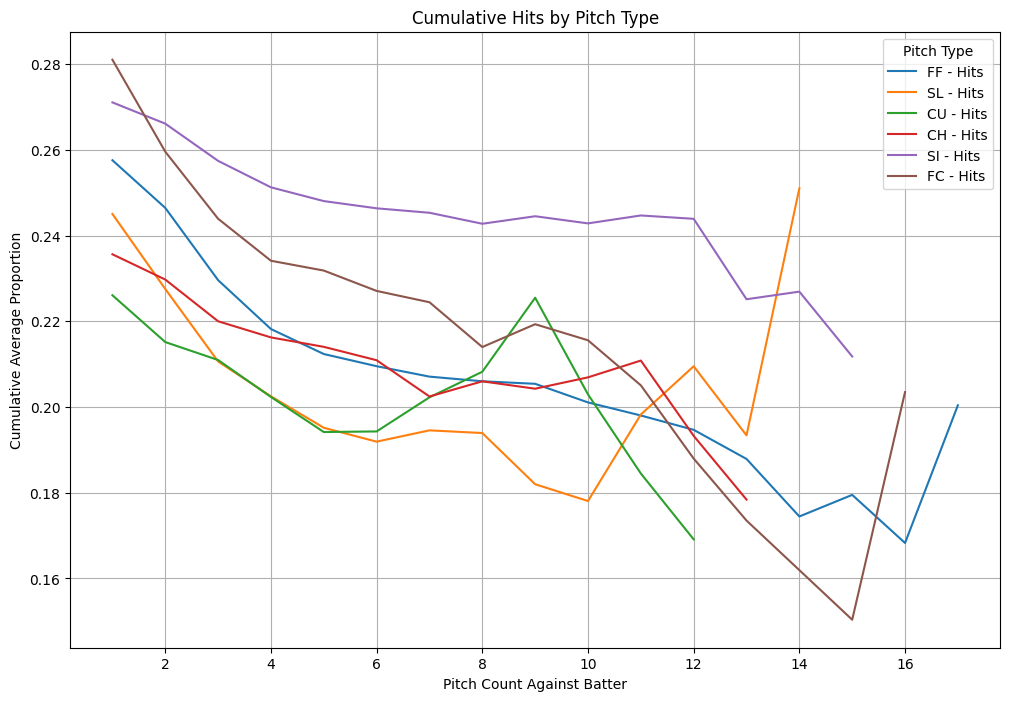

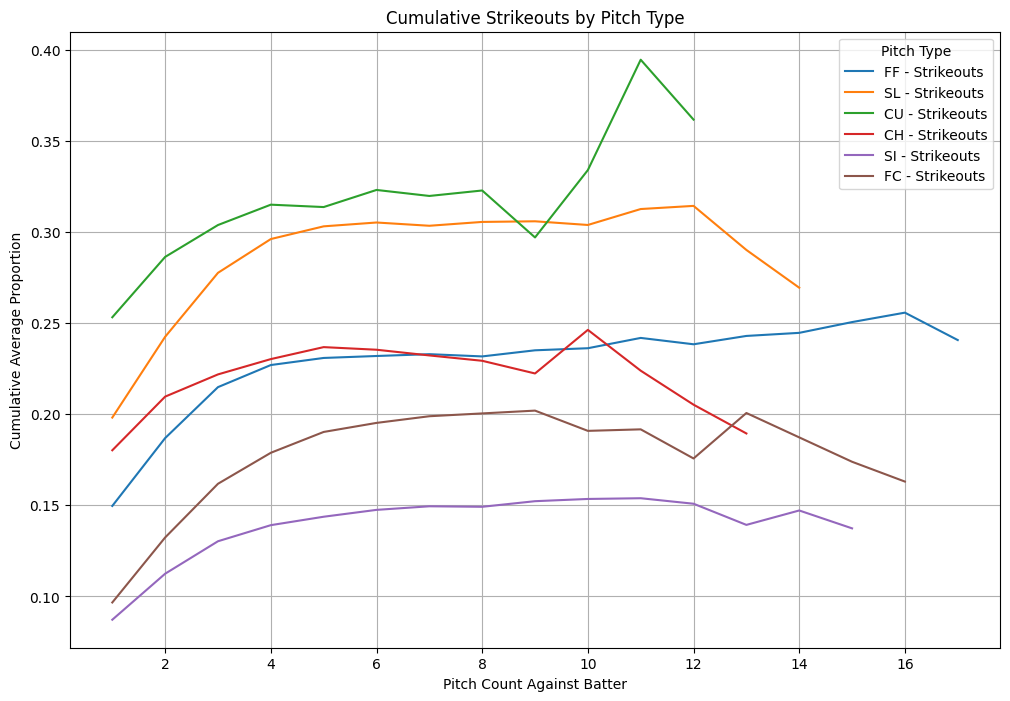

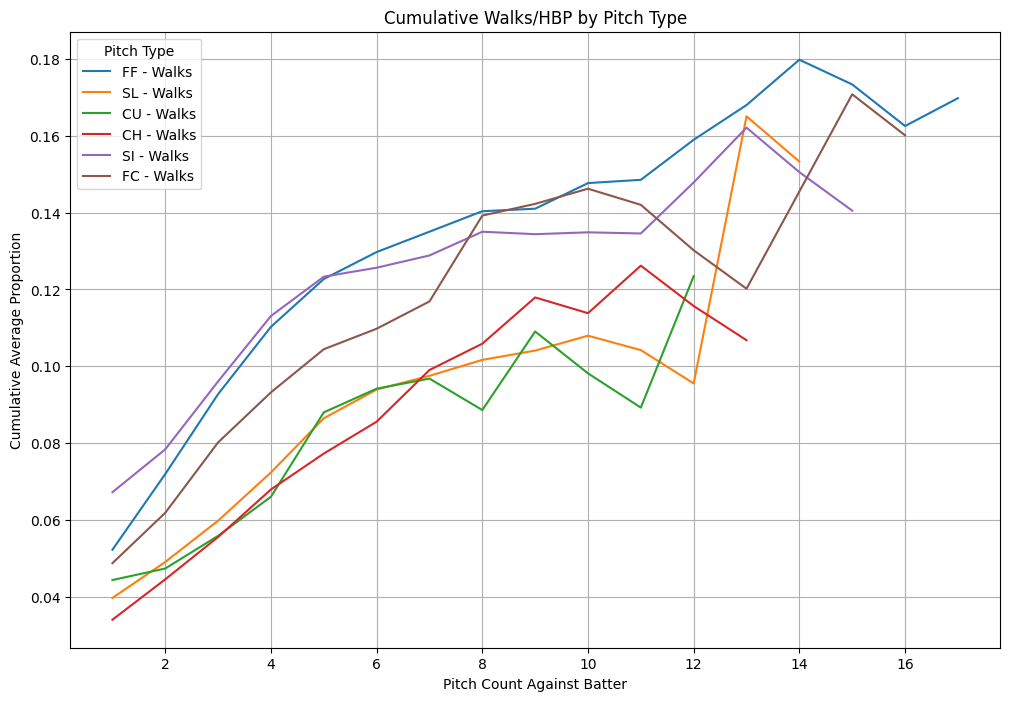

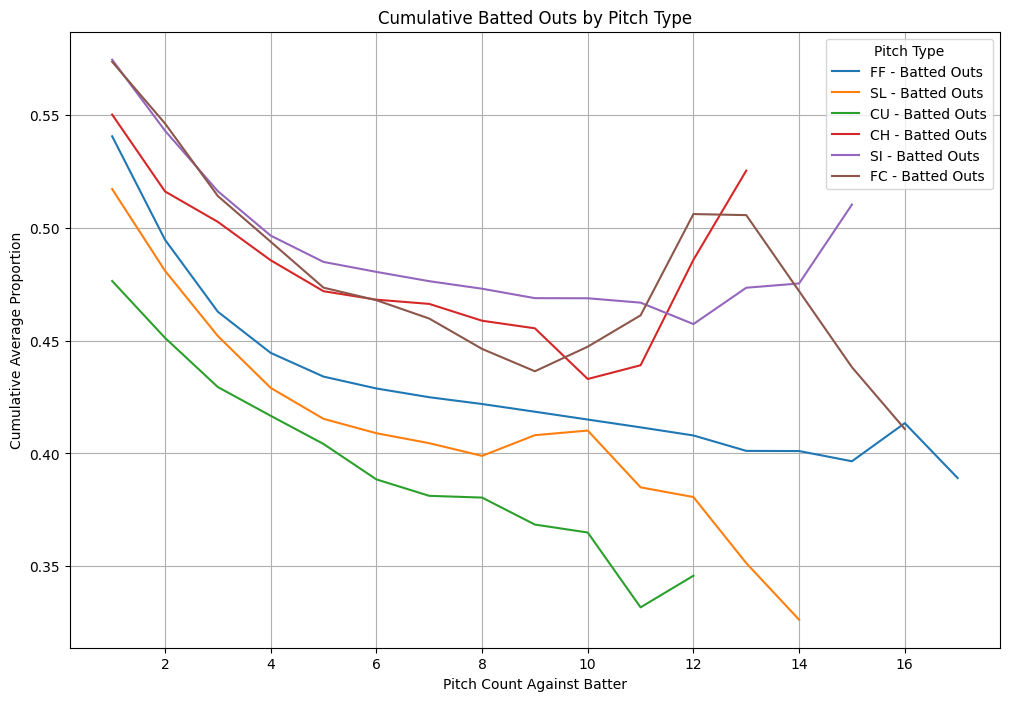

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# List of common pitch types to analyze
pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']  # Fastball, Slider, Curveball, Changeup, Sinker, Cutter

# Initialize an empty dataframe to store cumulative results for all pitch types
all_pitches_data = pd.DataFrame()

# Loop through each pitch type and perform cumulative analysis
for pitch in pitch_types:
    # Filter the dataset for the current pitch type
    pitch_data = filtered_data[filtered_data['pitch_type'] == pitch]

    # Create a pivot table to count occurrences of each event by pitch count
    cumulative_analysis = pd.pivot_table(
        pitch_data,
        values='pitch_type',
        index='pitch_count_bt_against_batter',
        columns='event_group',
        aggfunc='count',
        fill_value=0
    )

    # Normalize the counts to get proportions
    cumulative_analysis = cumulative_analysis.div(cumulative_analysis.sum(axis=1), axis=0)

    # Calculate cumulative averages for each event type
    cumulative_analysis['cumulative_hits'] = cumulative_analysis['hit'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_strikeouts'] = cumulative_analysis['strikeout'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_walks'] = cumulative_analysis['walk/hbp'].cumsum() / cumulative_analysis.index
    cumulative_analysis['cumulative_batted_out'] = cumulative_analysis['batted_out'].cumsum() / cumulative_analysis.index

    # Add a column for pitch type
    cumulative_analysis['pitch_type'] = pitch

    # Append the results to the all_pitches_data dataframe
    all_pitches_data = pd.concat([all_pitches_data, cumulative_analysis.reset_index()])

# Plotting the cumulative averages for all pitch types on the same chart
plt.figure(figsize=(12, 8))

# Plot cumulative hits for each pitch type
for pitch in pitch_types:
    subset = all_pitches_data[all_pitches_data['pitch_type'] == pitch]
    plt.plot(subset['pitch_count_bt_against_batter'], subset['cumulative_hits'], label=f'{pitch} - Hits')

plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Cumulative Average Proportion')
plt.title('Cumulative Hits by Pitch Type')
plt.legend(title='Pitch Type')
plt.grid(True)
plt.show()

# Repeat the plotting process for other metrics (strikeouts, walks, batted outs)

# Plot cumulative strikeouts
plt.figure(figsize=(12, 8))
for pitch in pitch_types:
    subset = all_pitches_data[all_pitches_data['pitch_type'] == pitch]
    plt.plot(subset['pitch_count_bt_against_batter'], subset['cumulative_strikeouts'], label=f'{pitch} - Strikeouts')

plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Cumulative Average Proportion')
plt.title('Cumulative Strikeouts by Pitch Type')
plt.legend(title='Pitch Type')
plt.grid(True)
plt.show()

# Plot cumulative walks
plt.figure(figsize=(12, 8))
for pitch in pitch_types:
    subset = all_pitches_data[all_pitches_data['pitch_type'] == pitch]
    plt.plot(subset['pitch_count_bt_against_batter'], subset['cumulative_walks'], label=f'{pitch} - Walks')

plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Cumulative Average Proportion')
plt.title('Cumulative Walks/HBP by Pitch Type')
plt.legend(title='Pitch Type')
plt.grid(True)
plt.show()

# Plot cumulative batted outs
plt.figure(figsize=(12, 8))
for pitch in pitch_types:
    subset = all_pitches_data[all_pitches_data['pitch_type'] == pitch]
    plt.plot(subset['pitch_count_bt_against_batter'], subset['cumulative_batted_out'], label=f'{pitch} - Batted Outs')

plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Cumulative Average Proportion')
plt.title('Cumulative Batted Outs by Pitch Type')
plt.legend(title='Pitch Type')
plt.grid(True)
plt.show()

In [37]:
# Encode event_group into numerical categories
event_mapping = {
    'hit': 1,
    'strikeout': 0,
    'walk/hbp': 2,
    'batted_out': 3
}
data['event_numeric'] = data['event_group'].map(event_mapping)

<ipython-input-37-c73b7250ec56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_numeric'] = data['event_group'].map(event_mapping)


In [38]:
# Group by batter, pitch type, and pitch count
batter_performance = data.groupby(['batter', 'pitch_type', 'pitch_count_bt_against_batter']).agg({
    'event_numeric': 'mean',  # Use the numeric version for calculations
    'release_speed': 'mean',
    'release_spin_rate': 'mean'
}).reset_index()

# Rename columns for clarity
batter_performance.rename(columns={'event_numeric': 'event_mean'}, inplace=True)

# Count the number of occurrences for each pitch type
pitch_counts = batter_performance['pitch_type'].value_counts()

# Set the threshold for minimum data points
min_threshold = 100

# Filter pitch types with sufficient data
relevant_pitch_types = pitch_counts[pitch_counts >= min_threshold].index

# Filter the main DataFrame
batter_performance = batter_performance[batter_performance['pitch_type'].isin(relevant_pitch_types)]

In [40]:
batter_performance.dropna(inplace=True)

In [42]:
# Ensure the DataFrame is sorted correctly for calculating trends
batter_performance = batter_performance.sort_values(by=['batter', 'pitch_type', 'pitch_count_bt_against_batter'])

# Calculate hit rate trends (change in performance across pitch counts)
batter_performance['hit_rate_trend'] = batter_performance.groupby(['batter', 'pitch_type'])['event_mean'].diff()
# Calculate the velocity drop
batter_performance['velocity_drop'] = batter_performance.groupby(['batter', 'pitch_type'])['release_speed'].diff()

In [45]:
# Count the number of occurrences for each pitch type
pitch_counts = batter_performance['pitch_type'].value_counts()

# Display pitch counts
print(pitch_counts)

pitch_type
FF    5155
SI    3878
SL    3535
CH    3075
FC    2882
ST    2561
CU    2495
FS    2050
KC    1483
SV     527
KN     205
EP     188
FA     184
Name: count, dtype: int64


In [46]:
data.columns

Index(['batter', 'pitch_type', 'pitch_count_bt_against_batter',
       'release_speed', 'release_spin_rate', 'event_group', 'hit', 'strikeout',
       'walk', 'event_numeric'],
      dtype='object')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by the pitch count against batter to analyze performance metrics
performance_analysis = filtered_data.groupby('pitch_count_bt_against_batter').agg({
    'release_speed': 'mean',
    'release_spin_rate': 'mean',
    'events': 'value_counts'
}).reset_index()

# Print the aggregated data
performance_analysis.head(12)

,index,release_speed,release_spin_rate,events
0,1.0,88.51488,2235.054759,NaN
1,2.0,88.850769,2245.811703,NaN
2,3.0,89.496402,2255.518335,NaN
3,4.0,90.053521,2260.291903,NaN
4,5.0,90.452746,2253.012611,NaN
5,6.0,90.854492,2258.022277,NaN
6,7.0,91.436598,2250.906991,NaN
7,8.0,91.691904,2250.936953,NaN
8,9.0,92.213898,2253.725367,NaN
9,10.0,92.859815,2261.809745,NaN


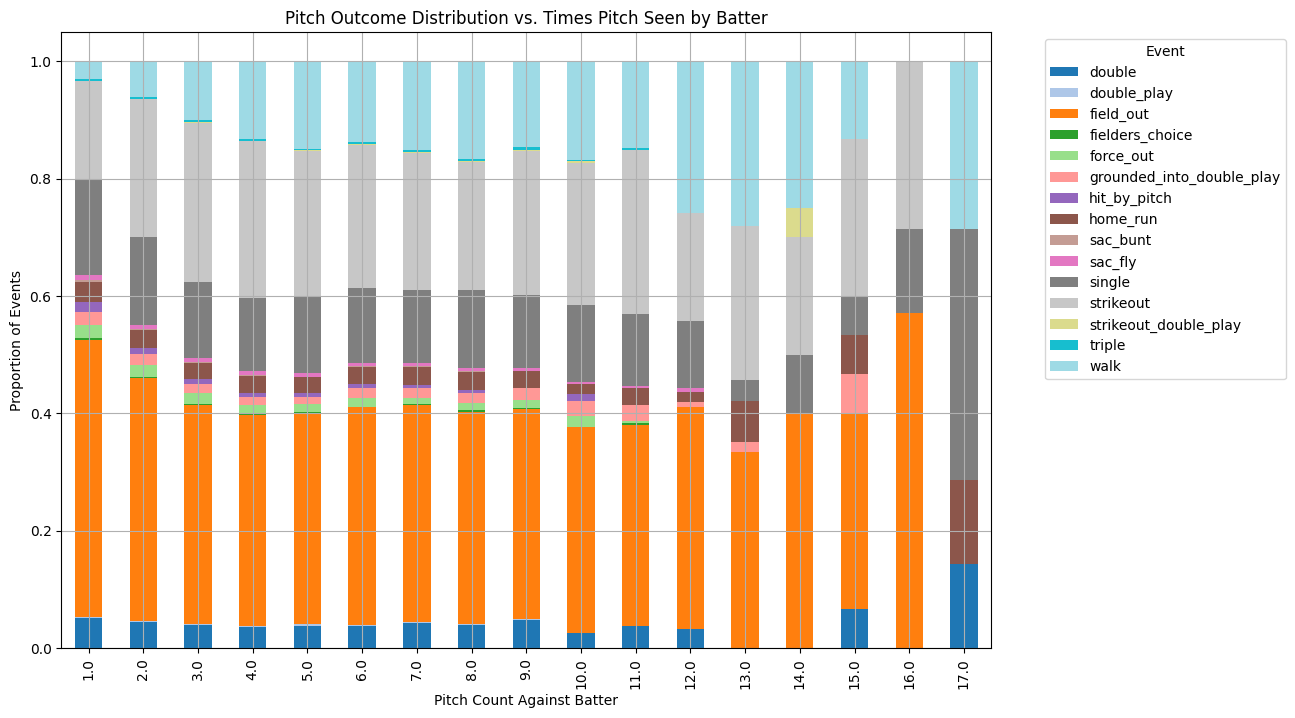

In [48]:
# Create a pivot table to count the frequency of different events for each pitch count
event_analysis = pd.pivot_table(filtered_data,
                                values='pitch_type',
                                index='pitch_count_bt_against_batter',
                                columns='events',
                                aggfunc='count',
                                fill_value=0)

# Normalize the counts to get the percentage distribution of events
event_analysis = event_analysis.div(event_analysis.sum(axis=1), axis=0)

# Plot the distribution of events
event_analysis.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.xlabel('Pitch Count Against Batter')
plt.ylabel('Proportion of Events')
plt.title('Pitch Outcome Distribution vs. Times Pitch Seen by Batter')
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

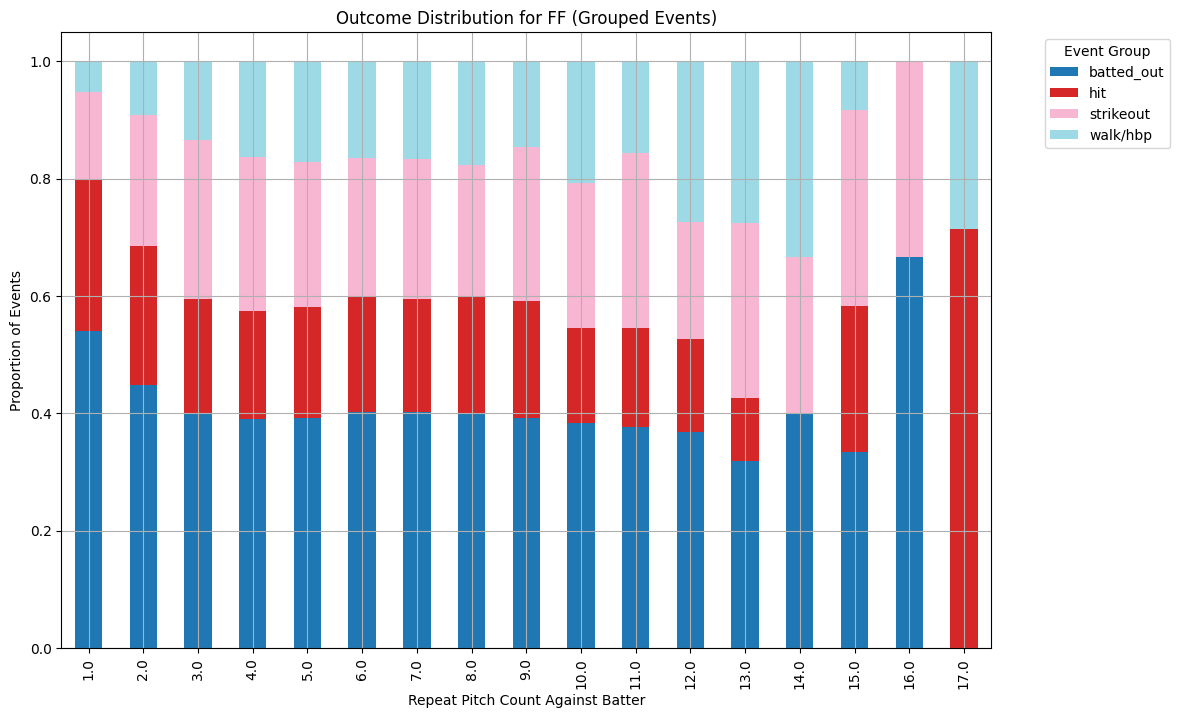

<Figure size 1200x800 with 0 Axes>

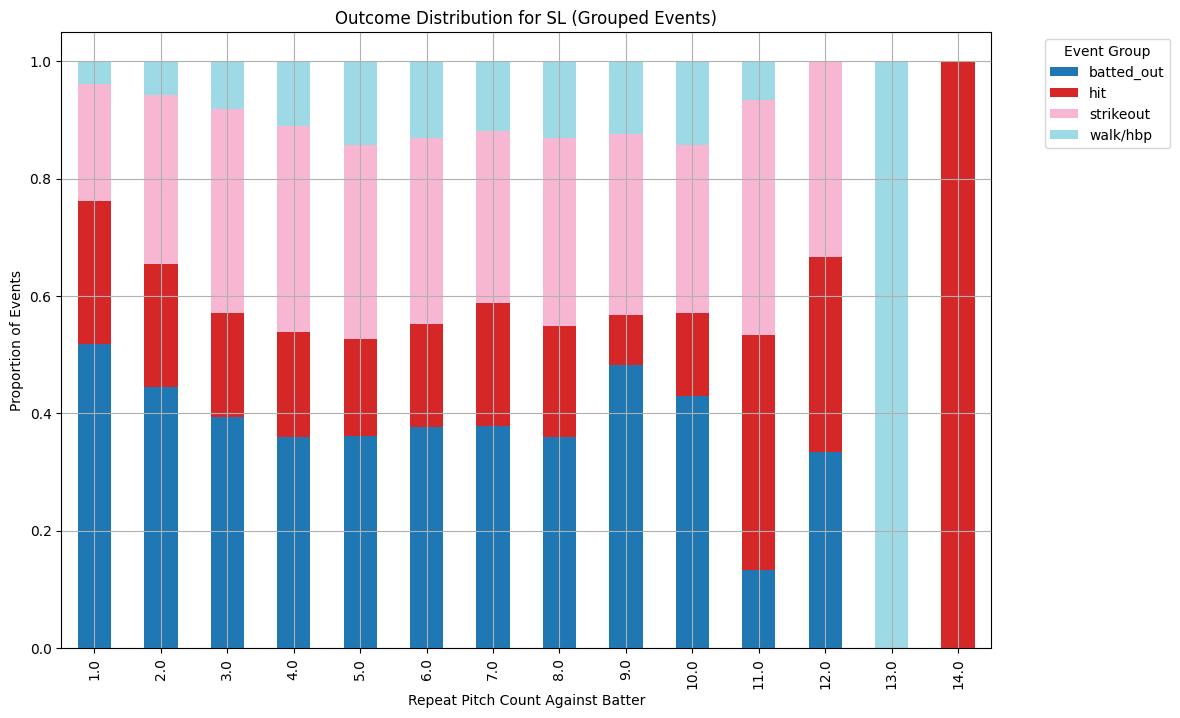

<Figure size 1200x800 with 0 Axes>

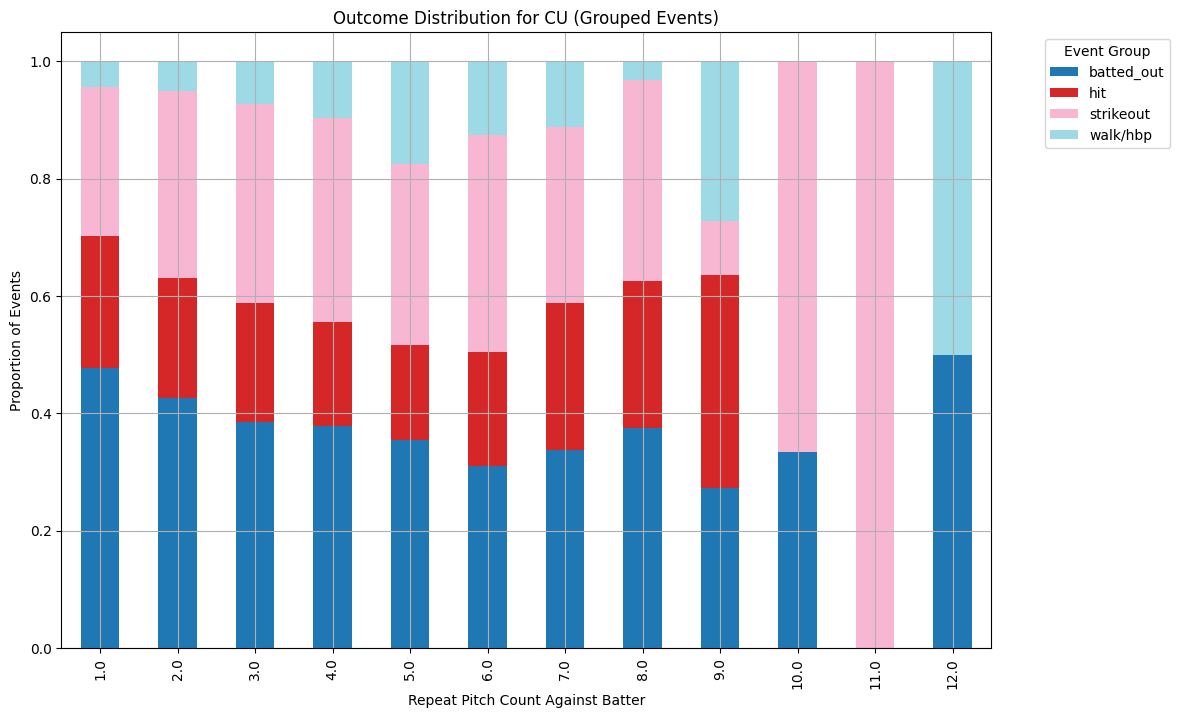

<Figure size 1200x800 with 0 Axes>

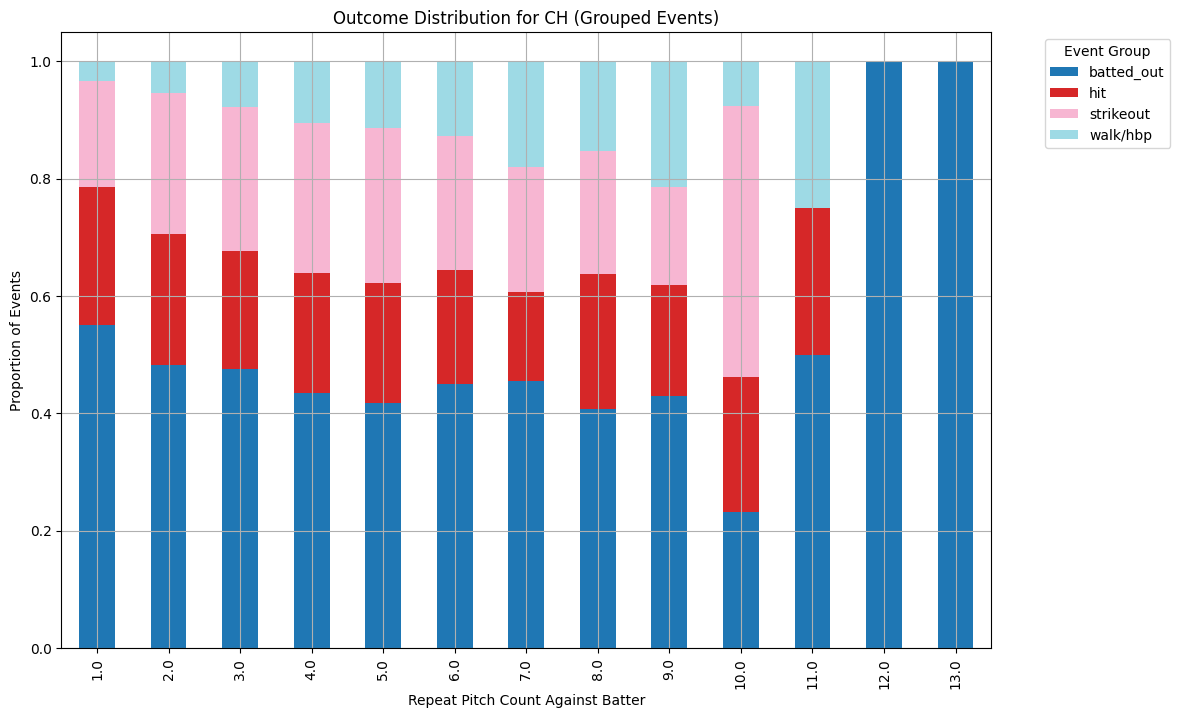

<Figure size 1200x800 with 0 Axes>

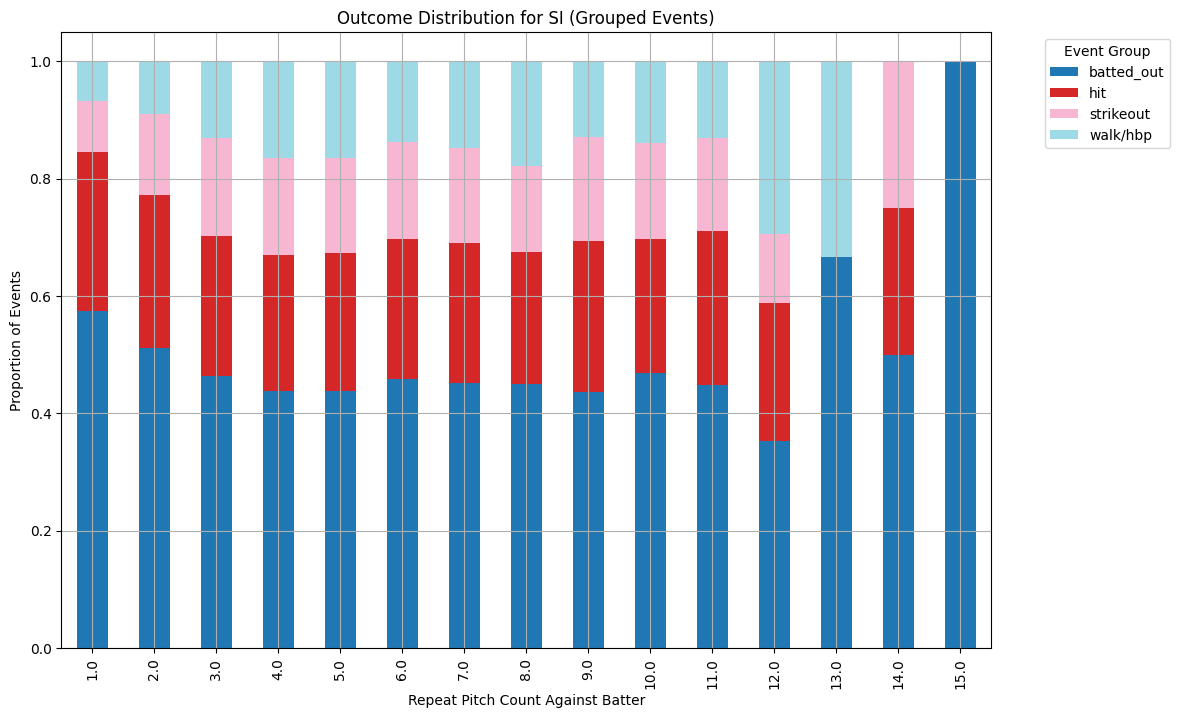

<Figure size 1200x800 with 0 Axes>

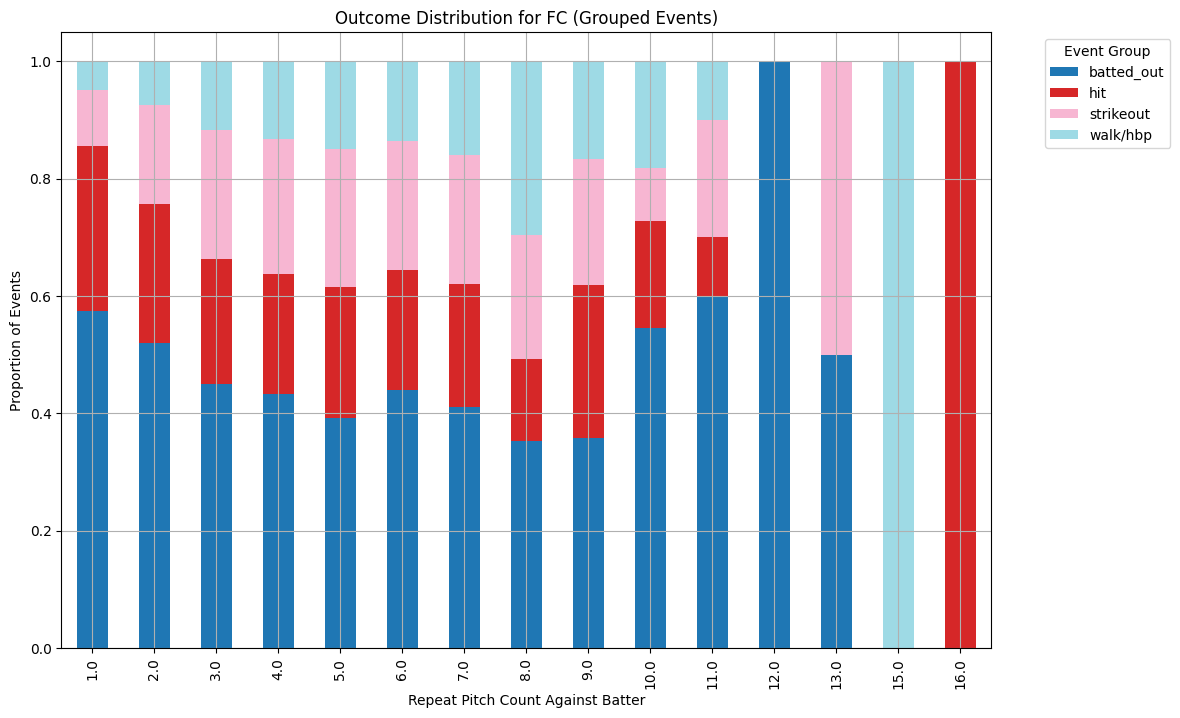

In [49]:

# Define a function to categorize events into broader groups
def categorize_event(event):
    if event in ['single', 'double', 'triple', 'home_run']:
        return 'hit'
    elif event in ['strikeout', 'strikeout_double_play']:
        return 'strikeout'
    elif event in ['walk', 'intent_walk', 'hit_by_pitch']:
        return 'walk/hbp'
    elif event in ['field_out', 'grounded_into_double_play', 'sac_fly', 'sac_bunt',
                   'force_out', 'double_play', 'fielders_choice']:
        return 'batted_out'
    else:
        return None  # Filter out irrelevant events

# Apply the categorization to your dataset
filtered_data['event_group'] = filtered_data['events'].apply(categorize_event)

# Now, let's generate visualizations based on these grouped events for different pitch types
pitch_types = ['FF', 'SL', 'CU', 'CH', 'SI', 'FC']  # Common pitch types

for pitch in pitch_types:
    # Filter the dataset for the current pitch type
    pitch_data = filtered_data[filtered_data['pitch_type'] == pitch]

    # Create a pivot table for event analysis by pitch count
    event_analysis = pd.pivot_table(
        pitch_data,
        values='pitch_type',
        index='pitch_count_bt_against_batter',
        columns='event_group',
        aggfunc='count',
        fill_value=0
    )

    # Normalize the counts to get the percentage distribution of events
    event_analysis = event_analysis.div(event_analysis.sum(axis=1), axis=0)

    # Plot the distribution of grouped events
    plt.figure(figsize=(12, 8))
    event_analysis.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
    plt.xlabel('Repeat Pitch Count Against Batter')
    plt.ylabel('Proportion of Events')
    plt.title(f'Outcome Distribution for {pitch} (Grouped Events)')
    plt.legend(title='Event Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()